In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

!pip install pypalettes
from pypalettes import load_cmap

/kaggle/input/hahe-statistics-all-programmes/hahe_all_21_24.csv


In [18]:
df = pd.read_csv("/kaggle/input/hahe-statistics-all-programmes/hahe_all_21_24.csv")
YEARS = ["2020-2021", "2021-2022", "2022-2023", "2023-2024"]
cmap = load_cmap("Pastel")

In [19]:
def plot_stats_by_theme(program_themes:  List[str]):
    if len(program_themes) > 1:
        themes = "|".join(program_themes)
    else:
        themes = program_themes[0]
    df_filtered = df[df["program"].str.contains(themes, na=False)]
    
    print(f"The number of {program_themes[0].title()} themed departments is {len(pd.unique(df_filtered[['institution', 'program']].values.ravel())) - 1}")
    
    graduates = []
    enrolled = []
    active = []
    registered = []
    
    for year in YEARS:
        graduates.append(df_filtered[df_filtered["academic_year"] == year]["graduate"].sum())
        enrolled.append(df_filtered[df_filtered["academic_year"] == year]["enrolled"].sum())
        active.append(df_filtered[df_filtered["academic_year"] == year]["active"].sum())
        registered.append(df_filtered[df_filtered["academic_year"] == year]["registered"].sum())
    
    plt.figure(figsize=(8,5))
    
    plt.plot(YEARS,graduates, marker='o', label="Graduates")
    plt.plot(YEARS, enrolled, marker='o', label="Enrolled")
    
    plt.xlabel("Academic Year")
    plt.ylabel("Number of Students")
    plt.title(f"{program_themes[0].title()} – Graduates & Enrolled Students per Academic Year")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8,5))
    plt.plot(YEARS, active, marker='o', label="Active")
    plt.plot(YEARS, registered, marker='o', label="Registered")
    plt.xlabel("Academic Year")
    plt.ylabel("Number of Students")
    plt.title(f"{program_themes[0].title()} – Active & Registered Students per Academic Year")
    plt.grid(True)
    plt.legend()
    plt.show()

The number of Law themed departments is 3


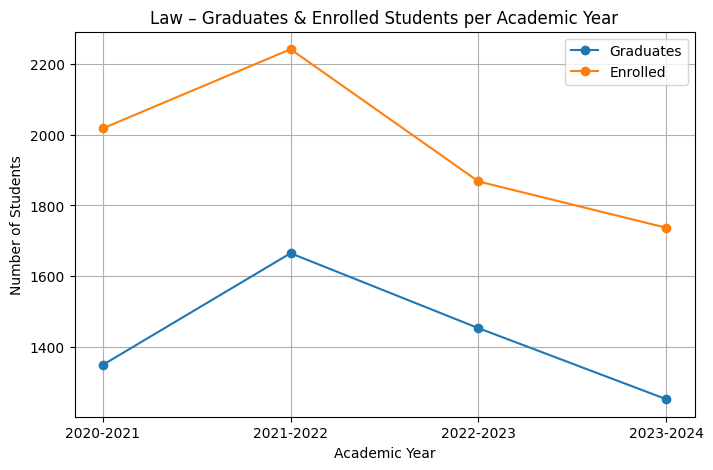

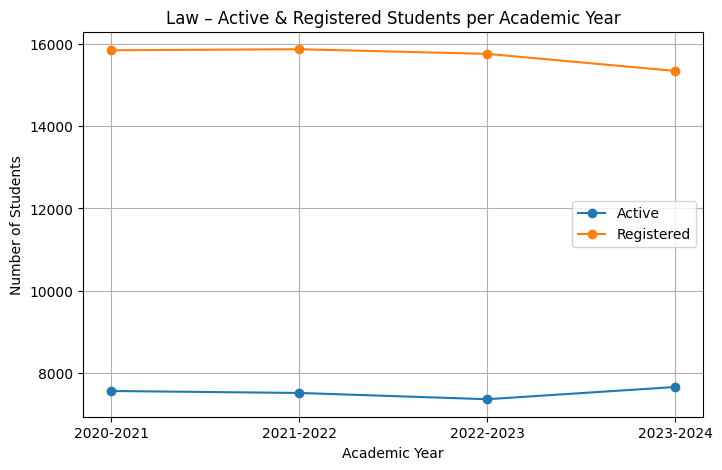

The number of Informatics themed departments is 29


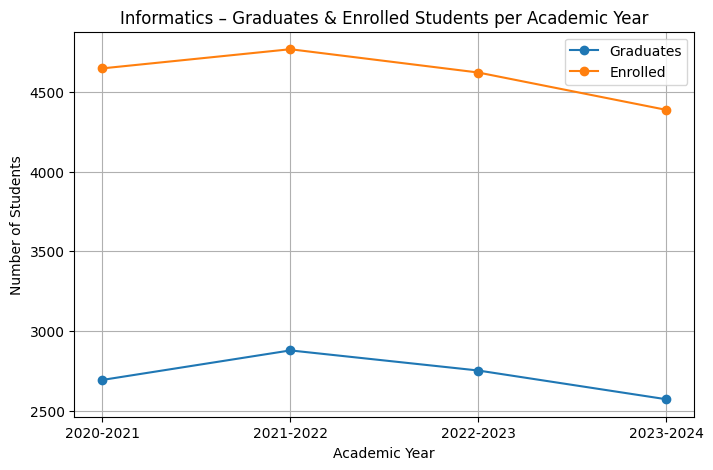

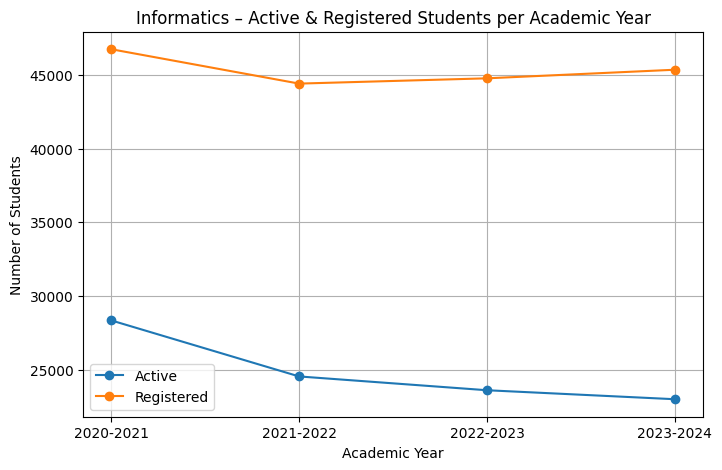

The number of Medicine themed departments is 9


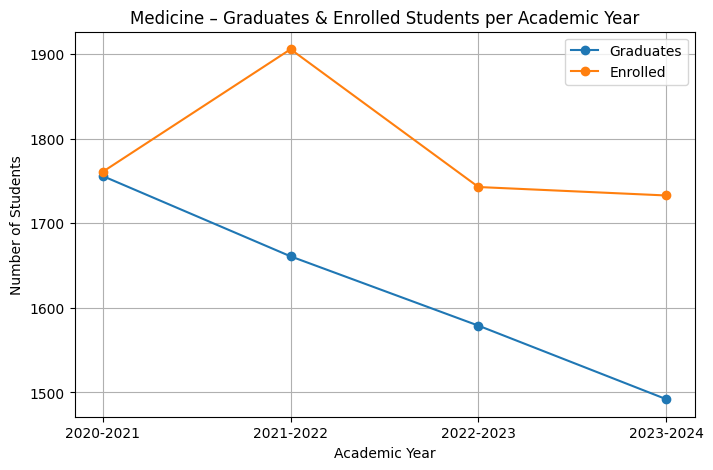

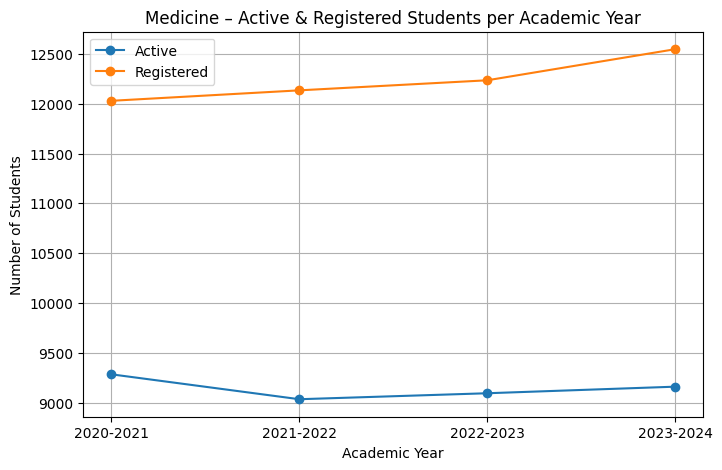

The number of Engineering themed departments is 67


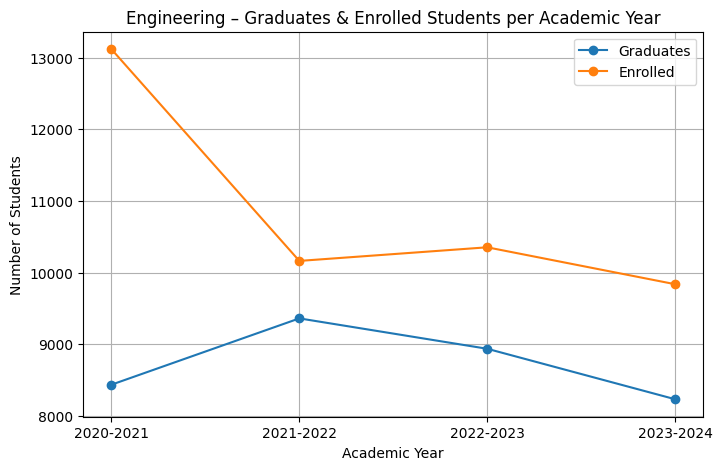

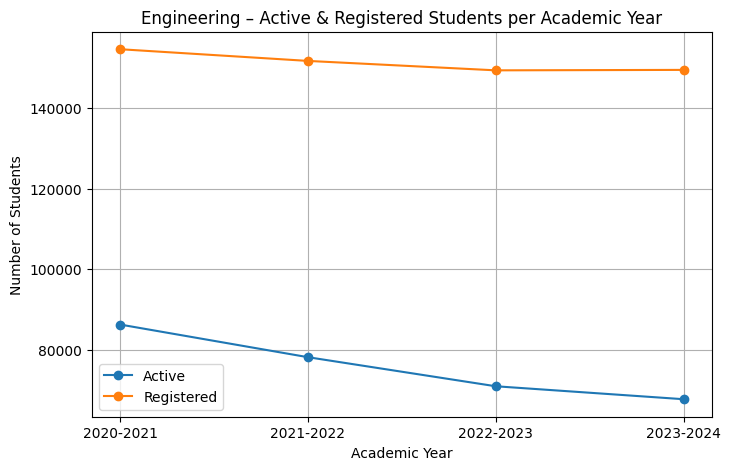

The number of Business themed departments is 23


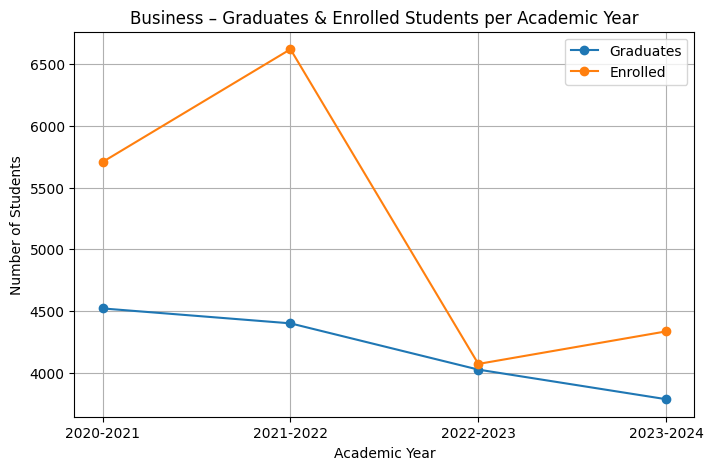

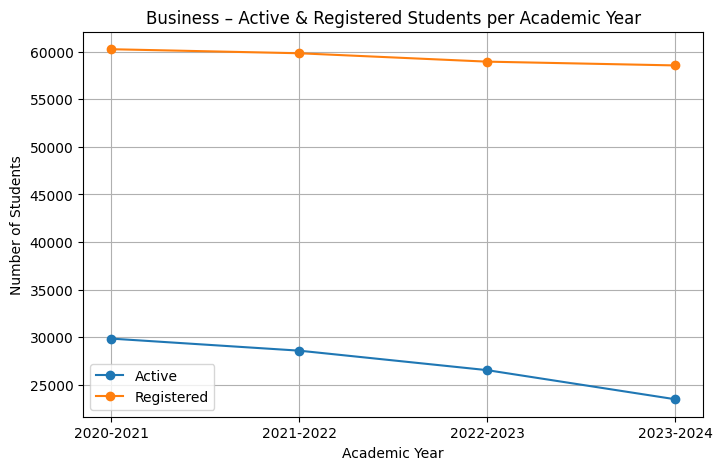

The number of Literature themed departments is 8


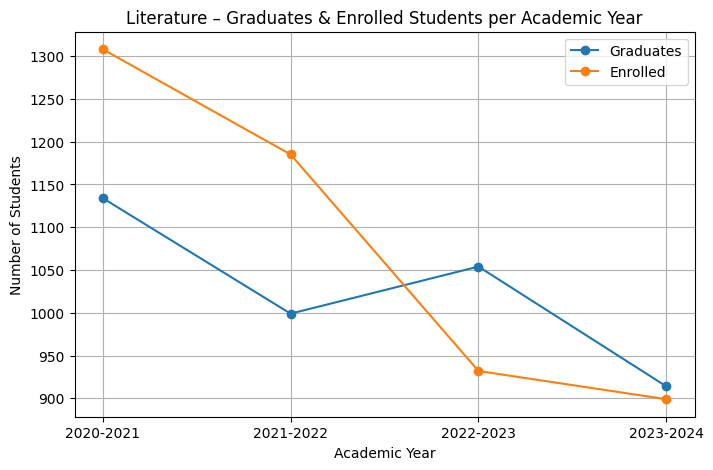

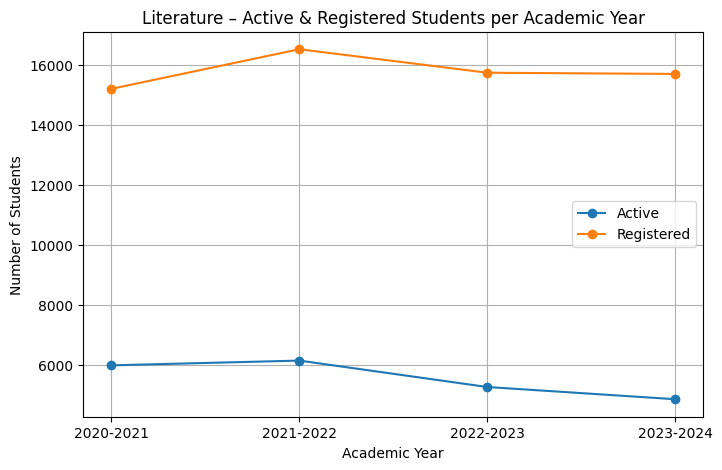

The number of Psychology themed departments is 7


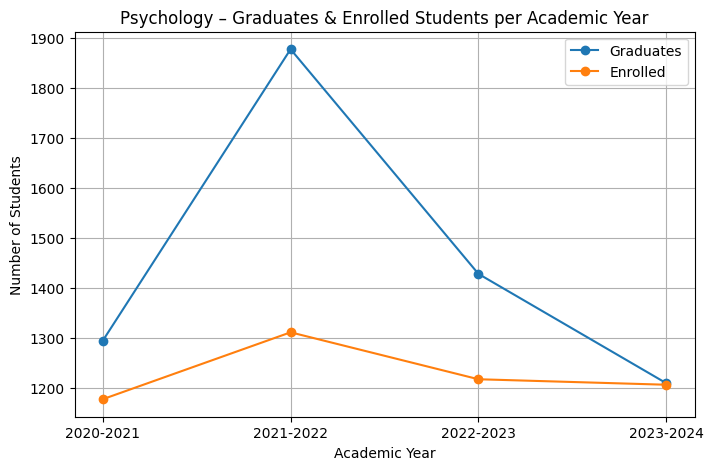

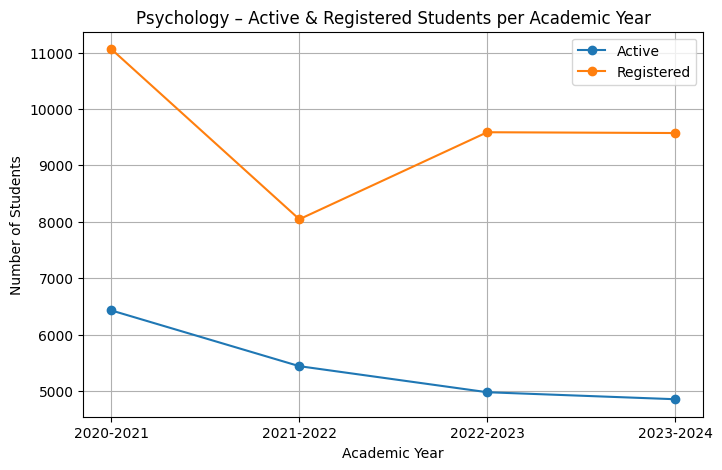

The number of Economics themed departments is 32


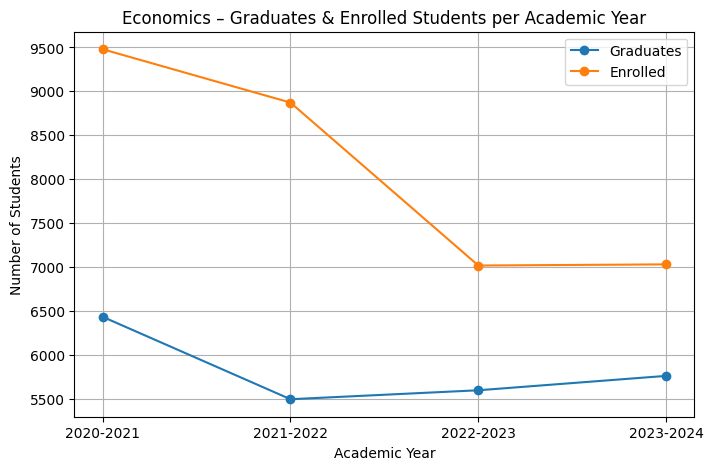

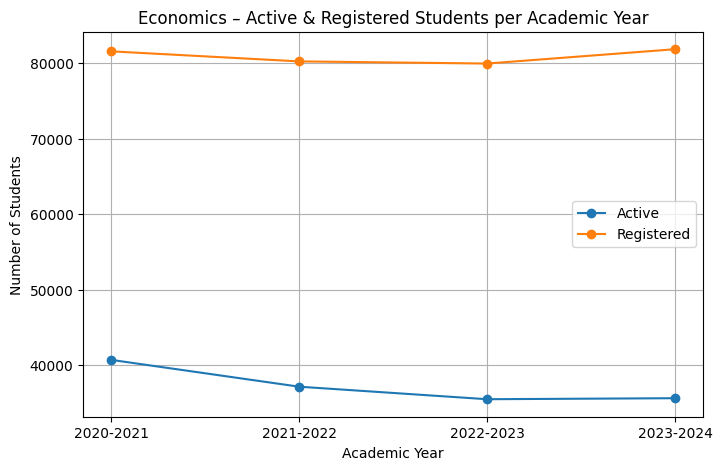

The number of Marketing themed departments is 3


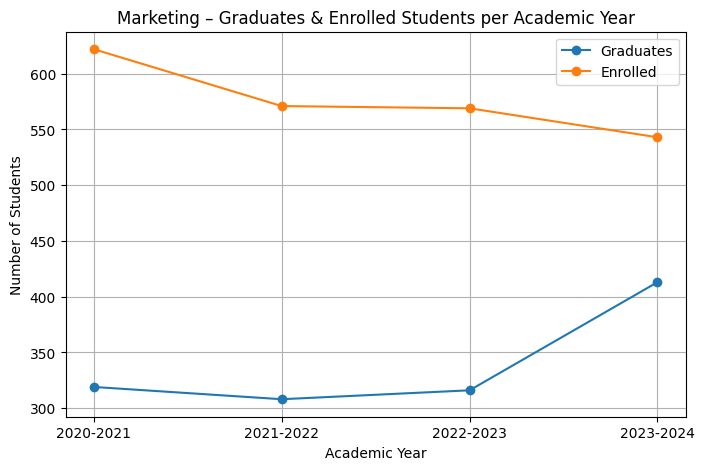

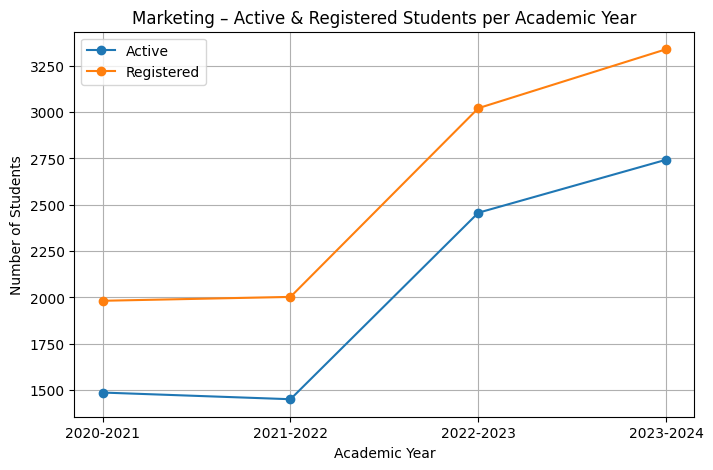

In [20]:
plot_stats_by_theme(["Law"])
plot_stats_by_theme(["Informatics", "Computer Science"])
plot_stats_by_theme(["Medicine"])
plot_stats_by_theme(["Engineering"])
plot_stats_by_theme(["Business"])
plot_stats_by_theme(["Literature"])
plot_stats_by_theme(["Psychology"])
plot_stats_by_theme(["Economics", "Finance", "Financial", "Econom", "Accounting"])
plot_stats_by_theme(["Marketing", "Market"])


In [21]:
def active_rate(df_filtered):
    pct = []
    for year in YEARS:
        active = df_filtered[df_filtered["academic_year"] == year]["active"].sum()
        registered = df_filtered[df_filtered["academic_year"] == year]["registered"].sum()
        
        if registered == 0:
            pct.append(0)
        else:
            pct.append((active / registered) * 100)
    return pct

def graduate_rate(df_filtered):
    pct = []
    for year in YEARS:
        graduate = df_filtered[df_filtered["academic_year"] == year]["graduate"].sum()
        active = df_filtered[df_filtered["academic_year"] == year]["active"].sum()
        
        if active == 0:
            pct.append(0)
        else:
            pct.append((graduate / active) * 100)
    return pct

['Law']
Informatics|Computer Science
['Medicine']
['Engineering']
['Business']
Marketing|Market
['Literature']
['Psychology']
Economics|Finance|Financial|Econom|Accounting


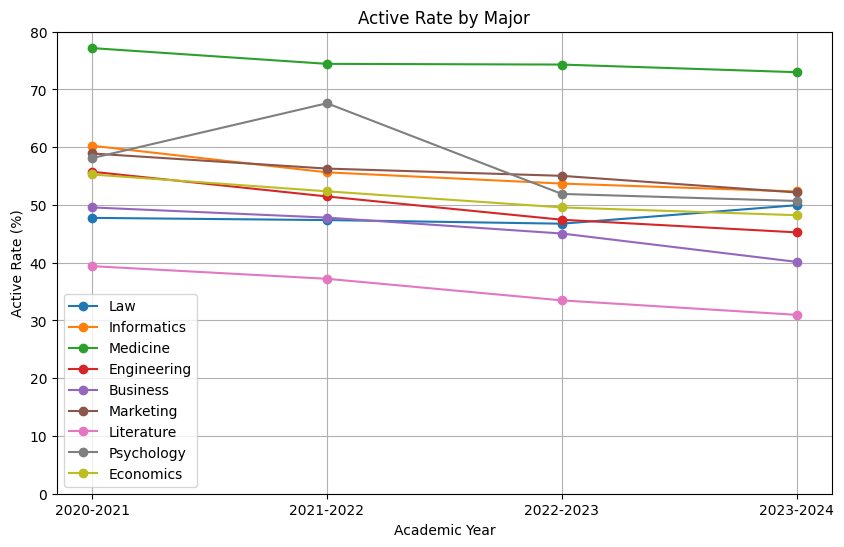

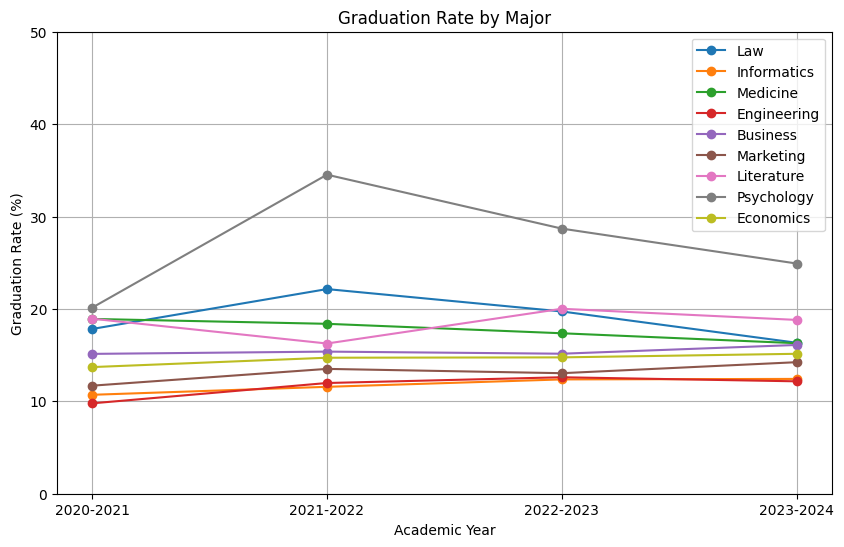

In [22]:
themes = [
    ["Law"],
    ["Informatics", "Computer Science"],
    ["Medicine"],
    ["Engineering"],
    ["Business"],
    ["Marketing", "Market"],
    ["Literature"],
    ["Psychology"],
    ["Economics", "Finance", "Financial", "Econom", "Accounting"],
]
active_rates = []
graduate_rates = []
for theme in themes:
    if len(theme) > 1:
        program_theme_pattern = "|".join(theme)
    else:
        program_theme_pattern = theme
    print(program_theme_pattern)
    df_filtered = df[df["program"].str.contains(program_theme_pattern[0] , na=False, regex=True)]
    active_rates.append(active_rate(df_filtered))
    graduate_rates.append(graduate_rate(df_filtered))

plt.figure(figsize=(10,6))

for theme, active_rate in zip (themes, active_rates):
    plt.plot(YEARS, active_rate, marker='o', label=theme[0])

plt.xlabel("Academic Year")
plt.ylabel("Active Rate (%)")
plt.title("Active Rate by Major")
plt.grid(True)
plt.ylim(0, 80)
plt.legend()
plt.show()


plt.figure(figsize=(10,6))

for theme, graduate_rate in zip (themes, graduate_rates):
    plt.plot(YEARS, graduate_rate, marker='o', label=theme[0])

plt.xlabel("Academic Year")
plt.ylabel("Graduation Rate (%)")
plt.title("Graduation Rate by Major")
plt.grid(True)
plt.ylim(0, 50)
plt.legend()
plt.show()

In [23]:
df['established'] = pd.to_datetime(
    df['established'], 
    format="%d/%m/%Y" # Correct format for day/month/year
)
# The established date defined here is not the correct one, since this code finds the oldest estsablished program
# An instituion's might be established date earlier, with programmes that currectly are not offered
df_grouped = (
    df.groupby(['institution', 'academic_year'], as_index=False)
      .agg({
          'established': 'min', 
          'program': 'count',
          'graduate': 'sum',
          'registered': 'sum',
          'enrolled': 'sum',
          'active': 'sum'
      })
)
df_grouped

institution academic_year established  program  \
0       Agricultural University of Athens     2020-2021  1985-03-28       12   
1       Agricultural University of Athens     2021-2022  1985-03-28       12   
2       Agricultural University of Athens     2022-2023  1985-03-28       12   
3       Agricultural University of Athens     2023-2024  1985-03-28       12   
4    Aristotle University of Thessaloniki     2020-2021  1917-09-14       42   
..                                    ...           ...         ...      ...   
107       University of Western Macedonia     2023-2024  1976-10-14       35   
108              University of the Aegean     2020-2021  1984-03-20       18   
109              University of the Aegean     2021-2022  1984-03-20       18   
110              University of the Aegean     2022-2023  1984-03-20       18   
111              University of the Aegean     2023-2024  1984-03-20       18   

     graduate  registered  enrolled  active  
0         701       13442      1532    7900  
1         911       13318       832    7232  
2         907       13225       923    6897  
3         883       12846       883    6490  
4        7327       73948      9095   42220  
..        ...         ...       ...     ...  
107      2481       39041      3385   15894  
108      1606       17163      3132   11353  
109      1702       17688      2327   10830  
110      1308       17688      2102   10712  
111      1099       18567      2370   10607  

[112 rows x 8 columns]

In [24]:
df_20_21 = df_grouped[df_grouped['academic_year'] == '2020-2021']
df_21_22 = df_grouped[df_grouped['academic_year'] == '2021-2022']
df_22_23 = df_grouped[df_grouped['academic_year'] == '2022-2023']
df_23_24 = df_grouped[df_grouped['academic_year'] == '2023-2024']

In [25]:
def plot_pie(df, feature):
    top_10 = df.sort_values(by=feature, ascending=False).head(10)
    other = df.sort_values(by=feature, ascending=False).tail(len(df) - 10)
    percentages = np.concatenate([top_10[feature], [other[feature].sum()]])
    fig, ax = plt.subplots()
    wedges, texts, autotext = ax.pie(percentages, autopct='%1.1f%%', colors=cmap.colors)
    ax.legend(wedges, np.concatenate([top_10["institution"], ["Other"]]),
              title="Institutions",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title(f"{feature} students per institution".capitalize)
    plt.show()

In [26]:
def calc_pie_stats(df, metric):
    top_10 = df.sort_values(by=metric, ascending=False).head(10)
    other = df.sort_values(by=metric, ascending=False).tail(len(df) - 10)
    institutions = np.concatenate([top_10["institution"], ["Other"]])
    return np.concatenate([top_10[metric], [other[metric].sum()]]), institutions


def plot_student_percentages(df, year):
    active = calc_pie_stats(df, "active")[0]
    registered = calc_pie_stats(df, "registered")[0]
    graduate = calc_pie_stats(df, "graduate")[0]
    enrolled = calc_pie_stats(df, "enrolled")[0]
    institutions = calc_pie_stats(df, "enrolled")[1]
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

    wedges, texts, autotext = ax1.pie(enrolled, autopct='%1.1f%%', colors=cmap.colors)
    ax2.pie(graduate, autopct='%1.1f%%', colors=cmap.colors)
    ax3.pie(registered, autopct='%1.1f%%', colors=cmap.colors)
    ax4.pie(active, autopct='%1.1f%%', colors=cmap.colors)
    
    ax1.legend(wedges, institutions,
              title="Institutions",
              loc="center left",
              bbox_to_anchor=(2.5, -0.5, 0.5, 1))
    
    ax1.set_title("Enrolled Students per Institution")
    ax2.set_title("Graduate Students per Institution")
    ax3.set_title("Registered Students per Institution")
    ax4.set_title("Active Students per Institution")
    fig.suptitle(f"Acedemic Year {year}")
    plt.show()

In [ ]:
plot_student_percentages(df_20_21, "2020-21")
plot_student_percentages(df_21_22, "2021-22")
plot_student_percentages(df_22_23, "2022-23")
plot_student_percentages(df_23_24, "2023-24")

In [80]:
def add_rates(df):
    df = df.copy()  # avoid modifying original if not desired
    grouped = df.groupby("institution")[["active", "registered", "graduate"]].transform("sum")
    df["active_rate"] = (grouped["active"] / grouped["registered"]) * 100
    df["graduate_rate"] = (grouped["graduate"] / grouped["active"]) * 100
    return df

df_20_21 = add_rates(df_20_21)
df_21_22 = add_rates(df_21_22)
df_22_23 = add_rates(df_22_23)
df_23_24 = add_rates(df_23_24)

In [82]:
df_grouped_rates = add_rates(df_grouped)
df_grouped_rates

institution academic_year established  program  \
0       Agricultural University of Athens     2020-2021  1985-03-28       12   
1       Agricultural University of Athens     2021-2022  1985-03-28       12   
2       Agricultural University of Athens     2022-2023  1985-03-28       12   
3       Agricultural University of Athens     2023-2024  1985-03-28       12   
4    Aristotle University of Thessaloniki     2020-2021  1917-09-14       42   
..                                    ...           ...         ...      ...   
107       University of Western Macedonia     2023-2024  1976-10-14       35   
108              University of the Aegean     2020-2021  1984-03-20       18   
109              University of the Aegean     2021-2022  1984-03-20       18   
110              University of the Aegean     2022-2023  1984-03-20       18   
111              University of the Aegean     2023-2024  1984-03-20       18   

     graduate  registered  enrolled  active  active_rate  graduate_rate  
0         701       13442      1532    7900    53.981564      11.928890  
1         911       13318       832    7232    53.981564      11.928890  
2         907       13225       923    6897    53.981564      11.928890  
3         883       12846       883    6490    53.981564      11.928890  
4        7327       73948      9095   42220    53.566824      16.791193  
..        ...         ...       ...     ...          ...            ...  
107      2481       39041      3385   15894    45.911390      10.764015  
108      1606       17163      3132   11353    61.179085      13.137327  
109      1702       17688      2327   10830    61.179085      13.137327  
110      1308       17688      2102   10712    61.179085      13.137327  
111      1099       18567      2370   10607    61.179085      13.137327  

[112 rows x 10 columns]

In [75]:
df_20_21

institution academic_year  \
0                    Agricultural University of Athens     2020-2021   
4                 Aristotle University of Thessaloniki     2020-2021   
8                           Athens School of Fine Arts     2020-2021   
12         Athens University of Economics and Business     2020-2021   
16                     Democritus University of Thrace     2020-2021   
20                                Harokopio University     2020-2021   
24                          Hellenic Air Force Academy     2020-2021   
28                               Hellenic Army Academy     2020-2021   
32                   Hellenic Mediterranean University     2020-2021   
36                              Hellenic Naval Academy     2020-2021   
40                            Hellenic Open University     2020-2021   
44                   International Hellenic University     2020-2021   
48                                   Ionian University     2020-2021   
52             National Technical University of Athens     2020-2021   
56      National and Kapodistrian University of Athens     2020-2021   
60   Panteion University of Social and Political Sc...     2020-2021   
64   School of Pedagogical and Technological Educat...     2020-2021   
68                       Technical University of Crete     2020-2021   
72                                 University of Crete     2020-2021   
76                              University of Ioannina     2020-2021   
80                             University of Macedonia     2020-2021   
84                                University of Patras     2020-2021   
88                           University of Peloponnese     2020-2021   
92                               University of Piraeus     2020-2021   
96                              University of Thessaly     2020-2021   
100                          University of West Attica     2020-2021   
104                    University of Western Macedonia     2020-2021   
108                           University of the Aegean     2020-2021   

    established  program  graduate  registered  enrolled  active  active_rate  \
0    1985-03-28       12       701       13442      1532    7900    58.771016   
4    1917-09-14       42      7327       73948      9095   42220    57.094174   
8    1990-07-03        2       215        2147       223    1426    66.418258   
12   1984-09-01        8      1559       22863      2018    9953    43.533220   
16   1974-05-25       20      2613       23547      4639   15742    66.853527   
20   1992-06-12        4       250        3214       461    2140    66.583696   
24   2003-10-07        1        59         302        81     302   100.000000   
28   1828-12-21        1       230         776       199     776   100.000000   
32   1983-11-24       26      1013       20645      2346   10400    50.375394   
36   2003-10-07        1        43         137        45     137   100.000000   
40   1998-12-11        8      1978       14971      3018   11913    79.573843   
44   1970-09-28       68      3406       55561      7841   31281    56.300283   
48   1984-03-20       17       678       10911      1578    7276    66.684997   
52   1887-06-20        9      1416       19965      1727   10773    53.959429   
56   1837-04-24       48      7408      100627      9350   43206    42.936786   
60   1963-11-07        9      1801       21534      2232    9977    46.331383   
64   2013-06-05        4       153        3630       460    2639    72.699725   
68   1983-03-01        5       359        6290       712    4693    74.610493   
72   1976-09-10       17      1938       20977      2870   13977    66.630119   
76   1966-03-14       33      3104       30401      4639   18403    60.534193   
80   1948-09-28       10      2185       12159      2164    8809    72.448392   
84   1967-05-07       50      4573       56024      7838   36738    65.575468   
88   2003-05-05       33      1406       23703      4232   15125    63.810488   
92   1984-

                                           institution academic_year  \
36                              Hellenic Naval Academy     2020-2021   
28                               Hellenic Army Academy     2020-2021   
80                             University of Macedonia     2020-2021   
60   Panteion University of Social and Political Sc...     2020-2021   
92                               University of Piraeus     2020-2021   
24                          Hellenic Air Force Academy     2020-2021   
16                     Democritus University of Thrace     2020-2021   
96                              University of Thessaly     2020-2021   
56      National and Kapodistrian University of Athens     2020-2021   
40                            Hellenic Open University     2020-2021   
76                              University of Ioannina     2020-2021   
4                 Aristotle University of Thessaloniki     2020-2021   
12         Athens University of Economics and Business     2020-

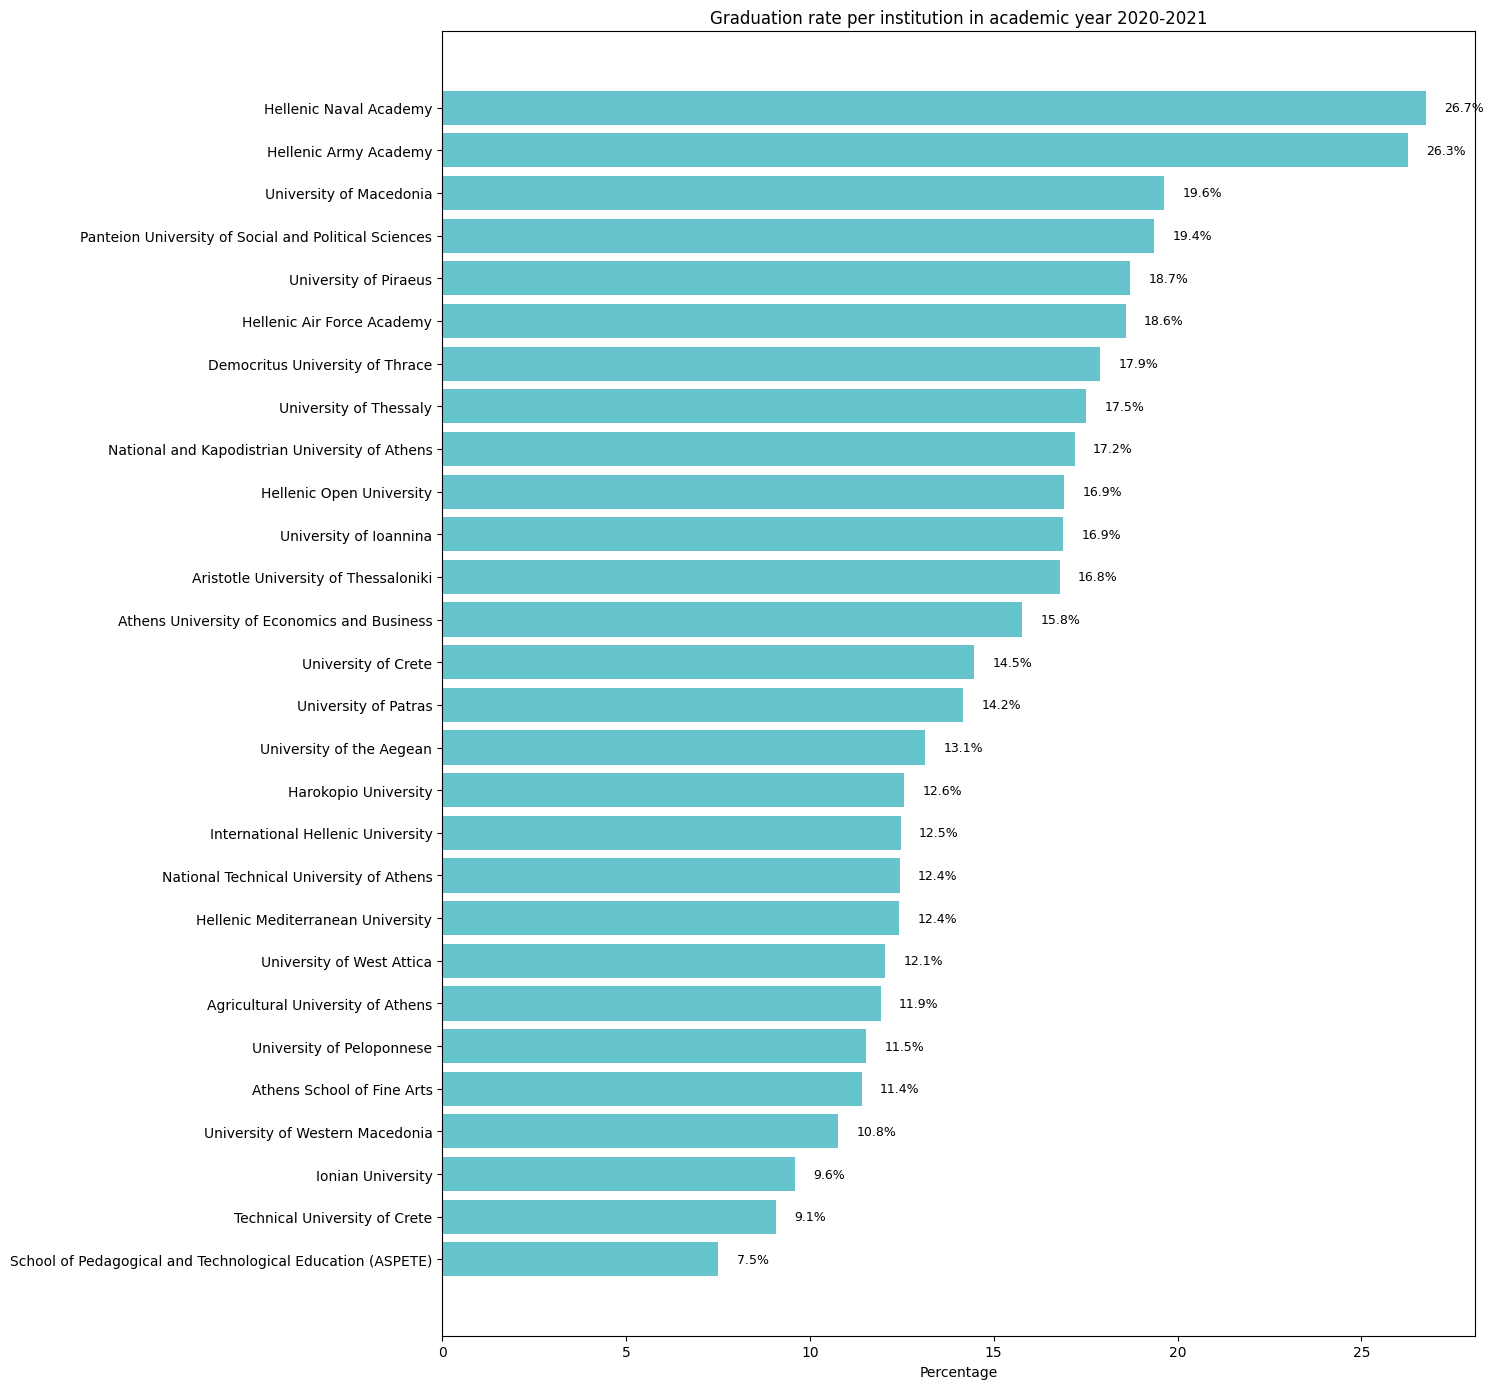

                                           institution academic_year  \
37                              Hellenic Naval Academy     2021-2022   
29                               Hellenic Army Academy     2021-2022   
81                             University of Macedonia     2021-2022   
61   Panteion University of Social and Political Sc...     2021-2022   
93                               University of Piraeus     2021-2022   
25                          Hellenic Air Force Academy     2021-2022   
17                     Democritus University of Thrace     2021-2022   
97                              University of Thessaly     2021-2022   
57      National and Kapodistrian University of Athens     2021-2022   
41                            Hellenic Open University     2021-2022   
77                              University of Ioannina     2021-2022   
5                 Aristotle University of Thessaloniki     2021-2022   
13         Athens University of Economics and Business     2021-

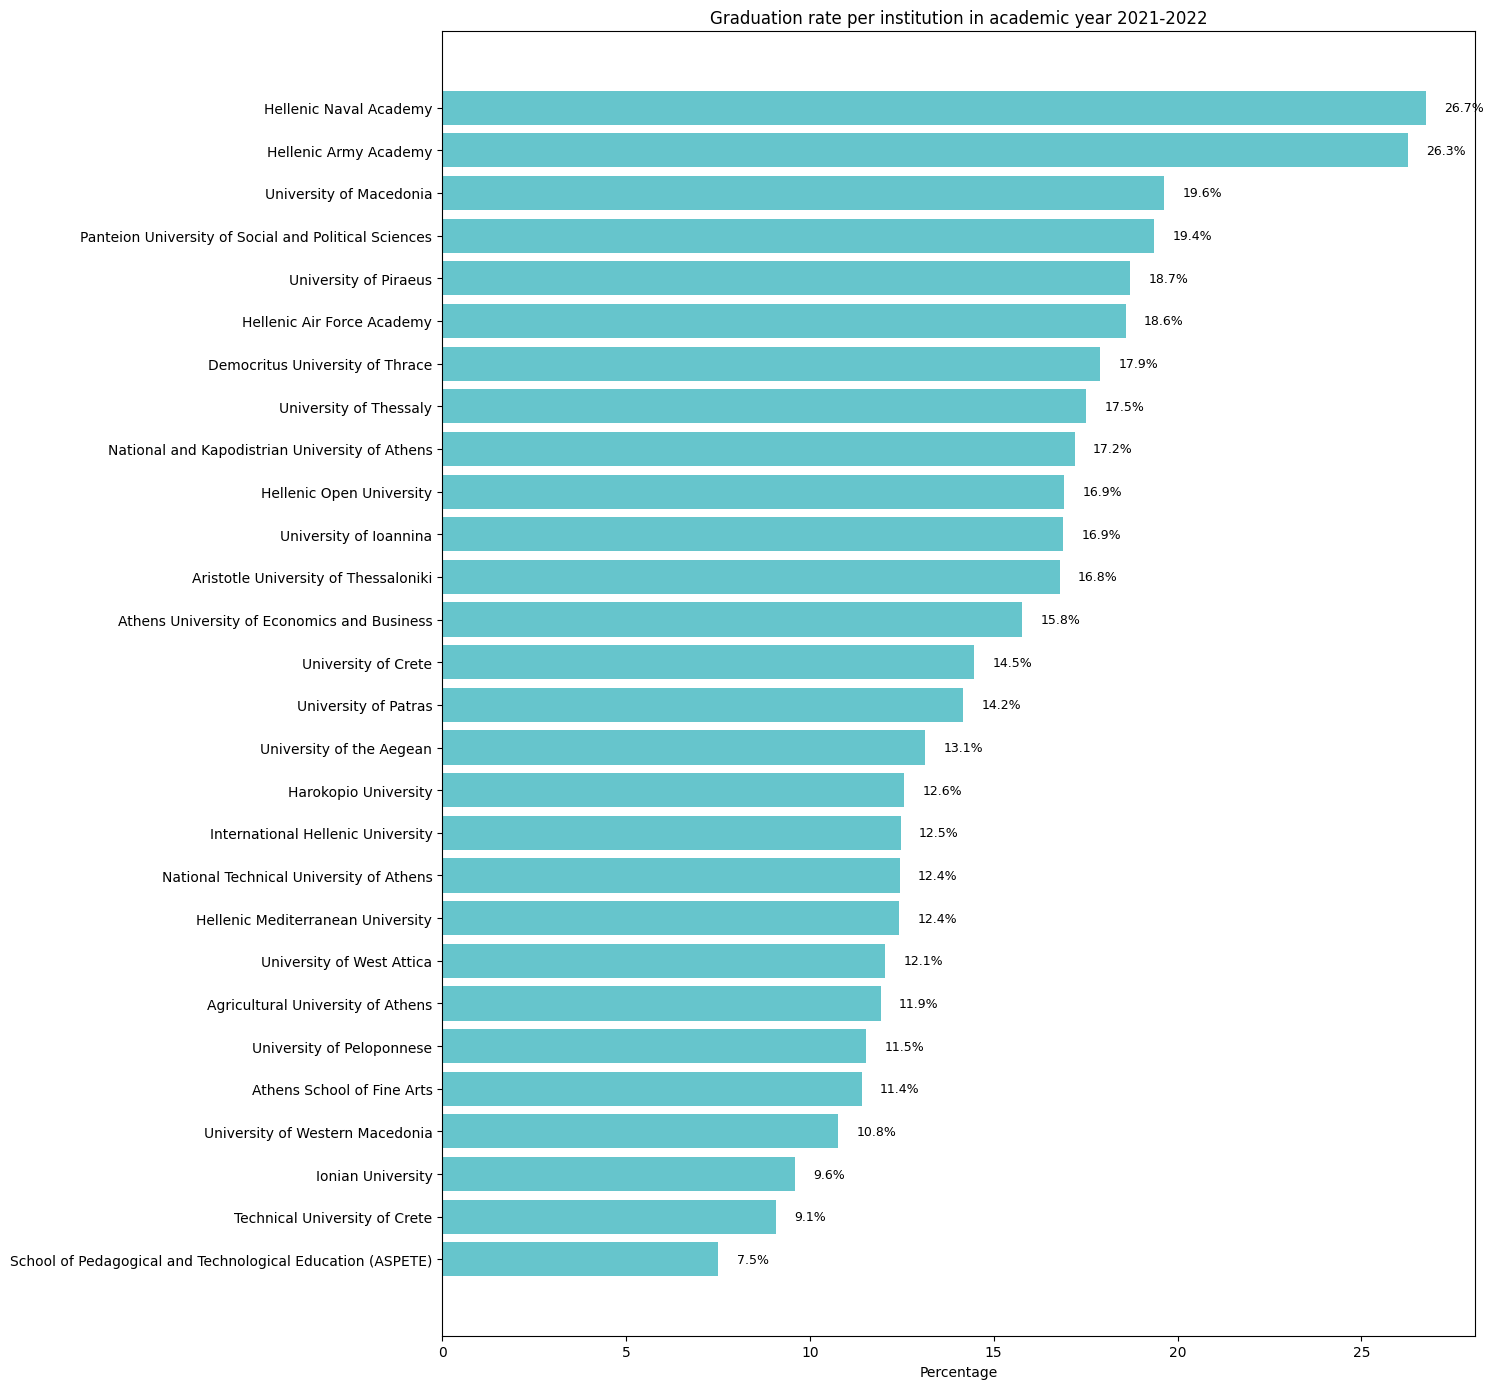

                                           institution academic_year  \
38                              Hellenic Naval Academy     2022-2023   
30                               Hellenic Army Academy     2022-2023   
82                             University of Macedonia     2022-2023   
62   Panteion University of Social and Political Sc...     2022-2023   
94                               University of Piraeus     2022-2023   
26                          Hellenic Air Force Academy     2022-2023   
18                     Democritus University of Thrace     2022-2023   
98                              University of Thessaly     2022-2023   
58      National and Kapodistrian University of Athens     2022-2023   
42                            Hellenic Open University     2022-2023   
78                              University of Ioannina     2022-2023   
6                 Aristotle University of Thessaloniki     2022-2023   
14         Athens University of Economics and Business     2022-

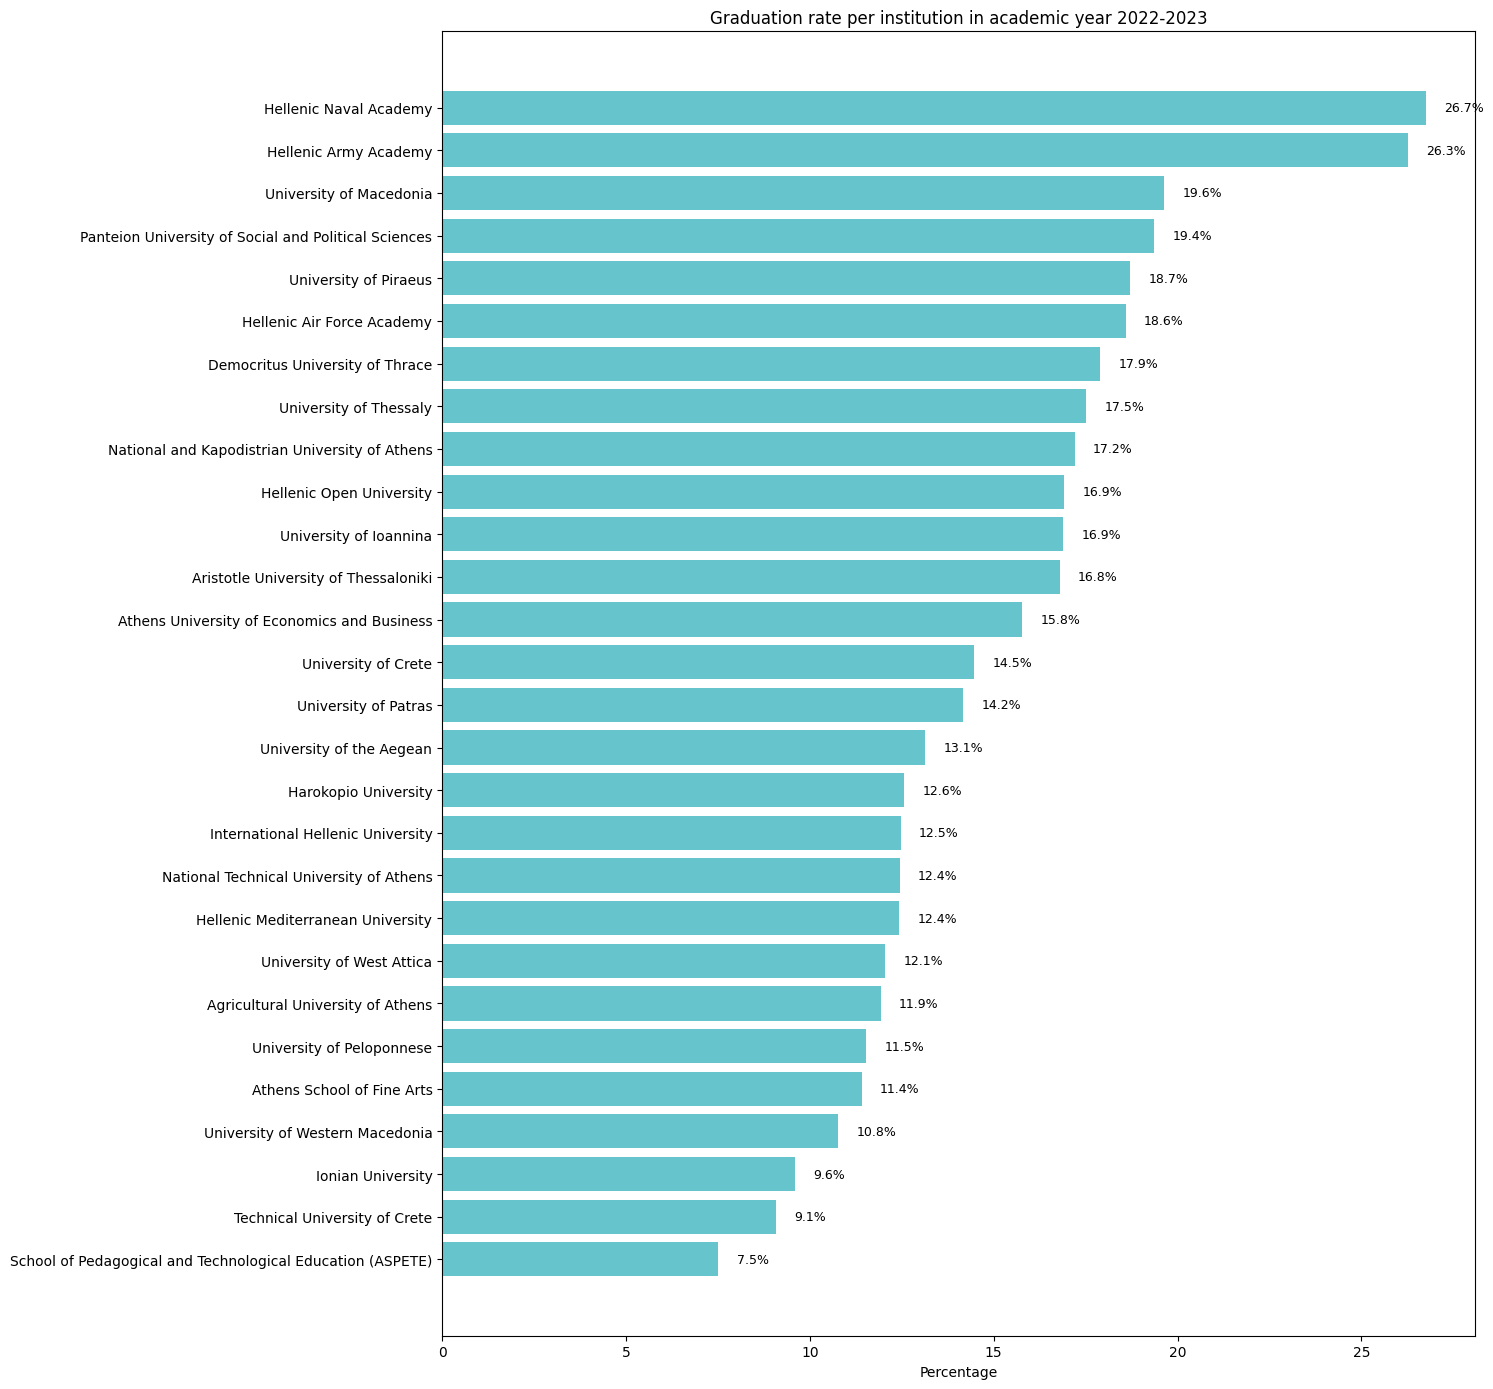

                                           institution academic_year  \
39                              Hellenic Naval Academy     2023-2024   
31                               Hellenic Army Academy     2023-2024   
83                             University of Macedonia     2023-2024   
63   Panteion University of Social and Political Sc...     2023-2024   
95                               University of Piraeus     2023-2024   
27                          Hellenic Air Force Academy     2023-2024   
19                     Democritus University of Thrace     2023-2024   
99                              University of Thessaly     2023-2024   
59      National and Kapodistrian University of Athens     2023-2024   
43                            Hellenic Open University     2023-2024   
79                              University of Ioannina     2023-2024   
7                 Aristotle University of Thessaloniki     2023-2024   
15         Athens University of Economics and Business     2023-

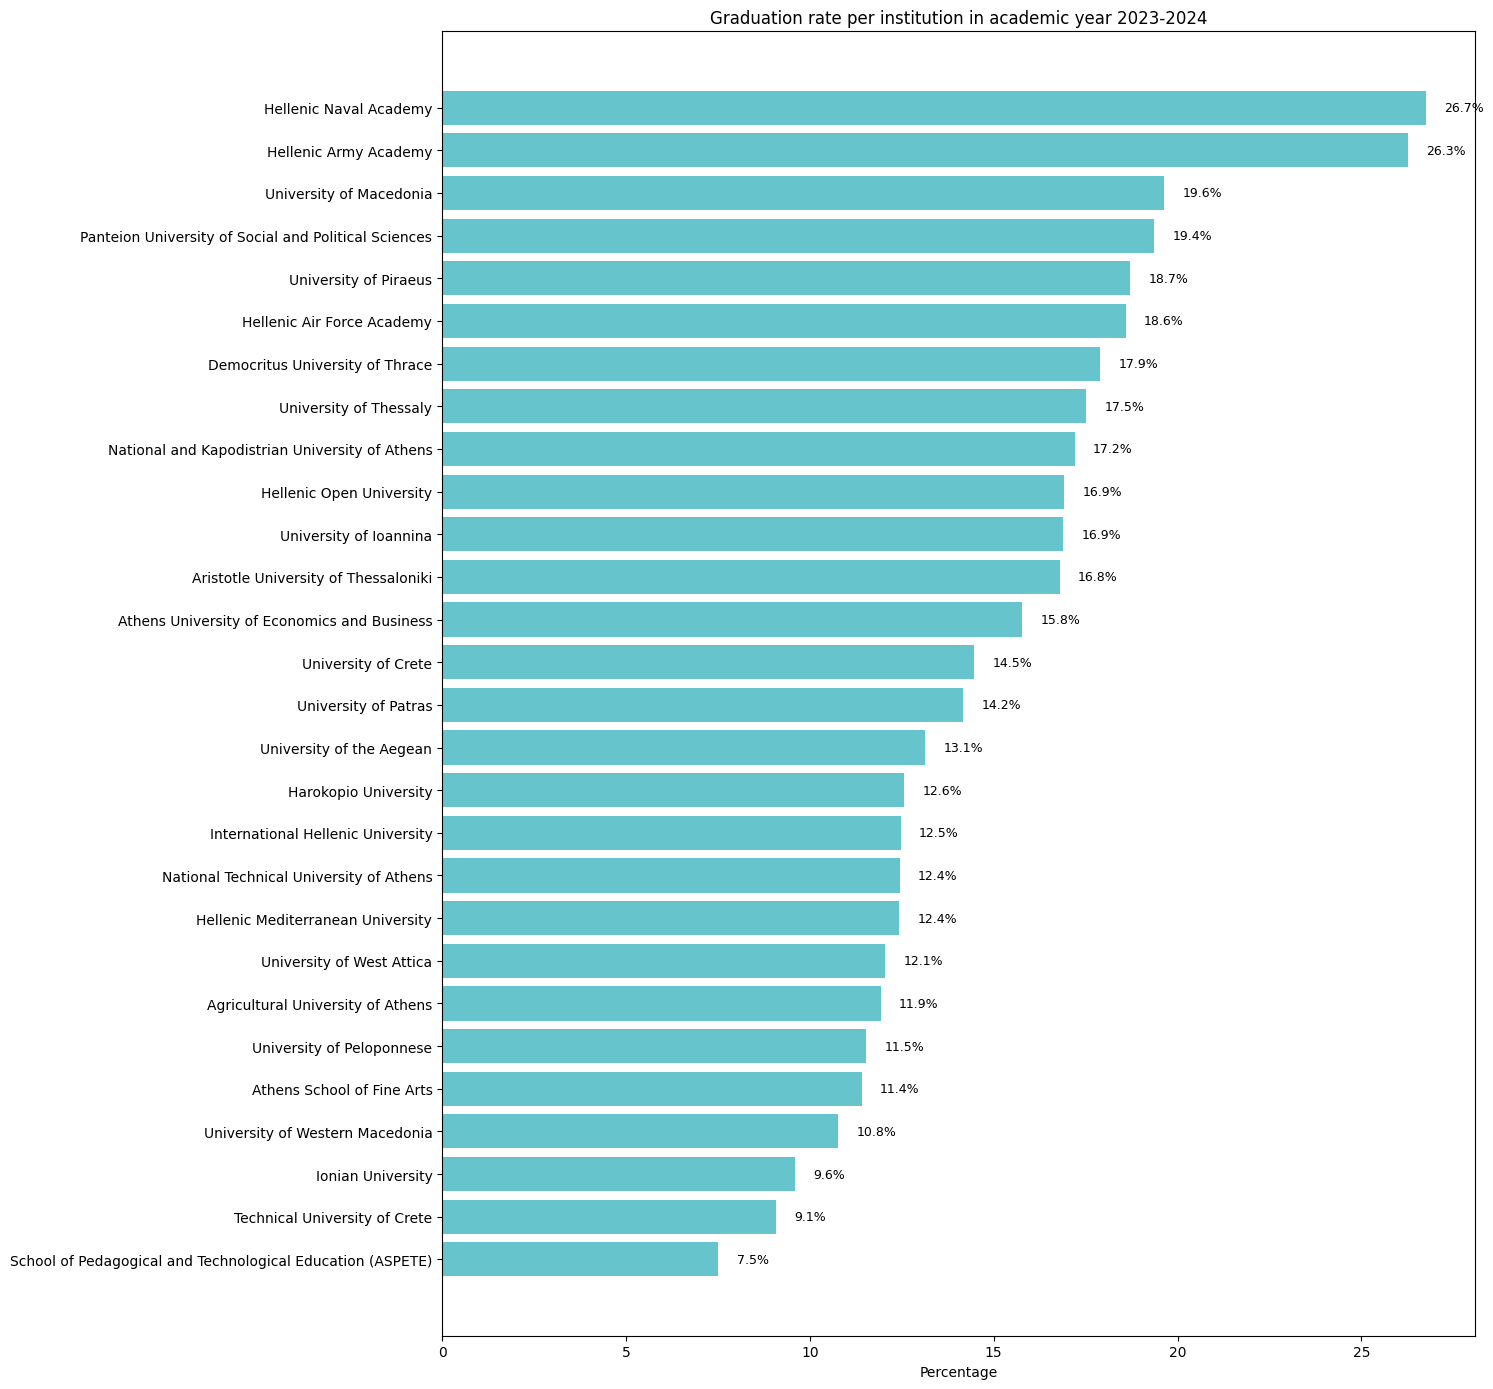

In [102]:
def plot_graduation_rate(df):
    for year in YEARS:
        df_filtered = df[df["academic_year"] == year].sort_values(by="graduate_rate", ascending=False)
        print(df_filtered)
        y_pos = np.arange(len(df_filtered))
        fig_height = max(6, len(df_filtered) * 0.5)
        fig, ax = plt.subplots(figsize=(15, fig_height))

        bars = ax.barh(y_pos, df_filtered["graduate_rate"], align="center", color=cmap.colors[0])
        ax.set_yticks(y_pos)
        ax.set_yticklabels(df_filtered["institution"])
        ax.invert_yaxis()
        ax.set_xlabel("Percentage")
        ax.set_title(f"Graduation rate per institution in academic year {year}")

        # Add values next to bars
        for bar in bars:
            width = bar.get_width()
            ax.text(
                width + 0.5,           # small offset to the right
                bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%',       # formatted value
                va='center',           # vertical alignment
                fontsize=9
            )

        plt.tight_layout()
        plt.show()


def plot_active_rate(df):
    prcs = []
    for year in YEARS:
        df_filtered = df[df["academic_year"] == year].sort_values(by="active_rate", ascending=False)
        prcs.append(df_filtered["active_rate"])
        y_pos = np.arange(len(df_filtered))
        fig_height = max(6, len(df_filtered) * 0.5)
        fig, ax = plt.subplots(figsize=(10, fig_height))

        bars = ax.barh(y_pos, df_filtered["active_rate"], align="center", color=cmap.colors[1])
        ax.set_yticks(y_pos)
        ax.set_yticklabels(df_filtered["institution"])
        ax.invert_yaxis()
        ax.set_xlabel("Percentage")
        ax.set_title(f"Student active rate per institution in academic year {year}")

        # Add values next to bars
        for bar in bars:
            width = bar.get_width()
            ax.text(
                width + 0.5,
                bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%',
                va='center',
                fontsize=9
            )

        plt.tight_layout()
        plt.show()

plot_graduation_rate(df_grouped_rates)
# plot_active_rate(df_grouped_rates)

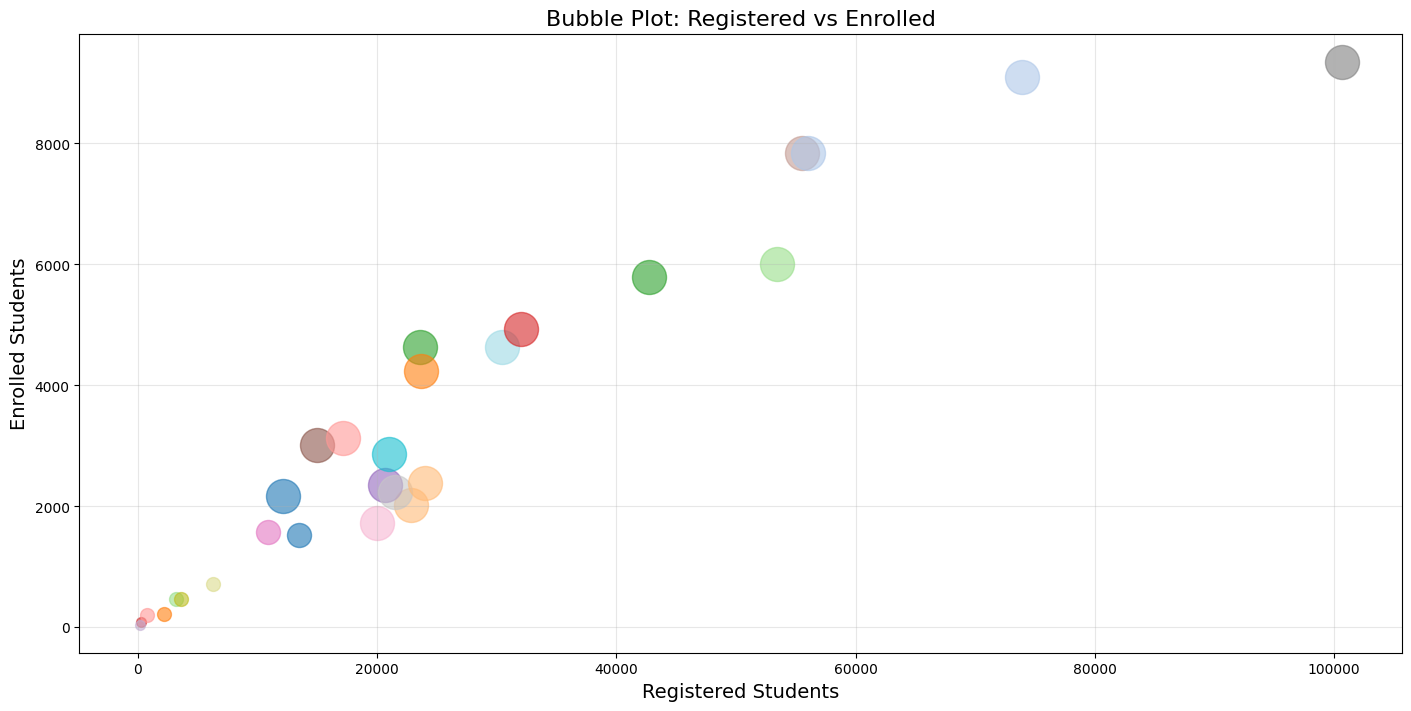

In [30]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

def plot_bubble_plot(df):
    plt.figure(figsize=(14, 7), constrained_layout=True)

    institutions = df['institution'].unique()
    colors = plt.cm.tab20.colors

    # Convert graduate counts into bubble sizes
    def size_from_graduates(g):
        if 100 <= g <= 500:
            return 100
        elif 501 <= g <= 1000:
            return 300
        elif g > 1000:
            return 600
        else:
            return 50

    # Scatter plot per institution
    for i, inst in enumerate(institutions):
        subset = df[df['institution'] == inst]
        bubble_sizes = subset['graduate'].apply(size_from_graduates)

        plt.scatter(
            subset['registered'],
            subset['enrolled'],
            s=bubble_sizes,
            alpha=0.6,
            label=inst,
            color=colors[i % len(colors)]
        )

    ax = plt.gca()

    # -------------------------------------------------
    # 1) Institution Legend
    # -------------------------------------------------
    inst_legend = ax.legend(
        title="Institution",
        bbox_to_anchor=(1.22, 1),
        loc="upper left"
    )
    ax.add_artist(inst_legend)   # prevent overwrite

    # -------------------------------------------------
    # 2) Bubble Size Legend (custom)
    # -------------------------------------------------

    # Scale factor so the circles look similar to scatter plot sizes
    scale = 0.2

    bubble_legend_handles = [
        Line2D([], [], marker='o', linestyle='',
               markersize=np.sqrt(100)*scale,
               color='gray', alpha=0.6, label='100–500'),
        Line2D([], [], marker='o', linestyle='',
               markersize=np.sqrt(300)*scale,
               color='gray', alpha=0.6, label='501–1000'),
        Line2D([], [], marker='o', linestyle='',
               markersize=np.sqrt(600)*scale,
               color='gray', alpha=0.6, label='1000+')
    ]

    bubble_legend = ax.legend(
        handles=bubble_legend_handles,
        title="Graduate Range",
        bbox_to_anchor=(1.22, 0.55),
        loc="upper left"
    )
    ax.add_artist(bubble_legend)

    # -------------------------------------------------

    plt.title("Bubble Plot: Registered vs Enrolled", fontsize=16)
    plt.xlabel("Registered Students", fontsize=14)
    plt.ylabel("Enrolled Students", fontsize=14)
    plt.grid(True, alpha=0.3)

    plt.show()


plot_bubble_plot(df_20_21)
# plot_bubble_plot(df_21_22)
# plot_bubble_plot(df_22_23)
# plot_bubble_plot(df_23_24)

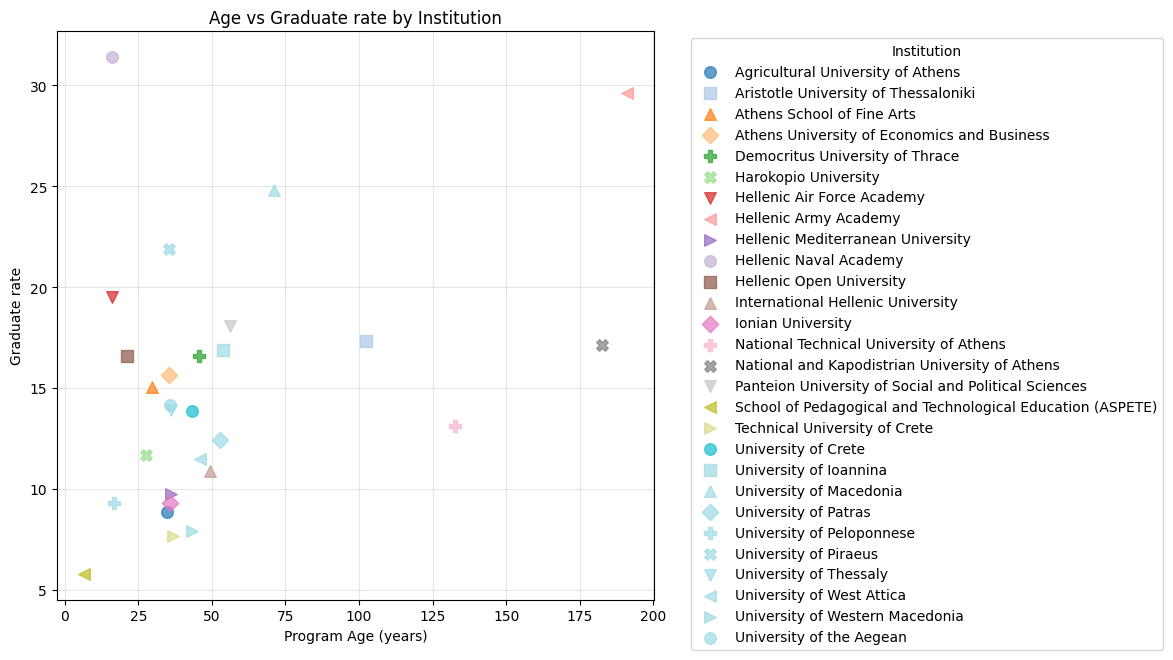

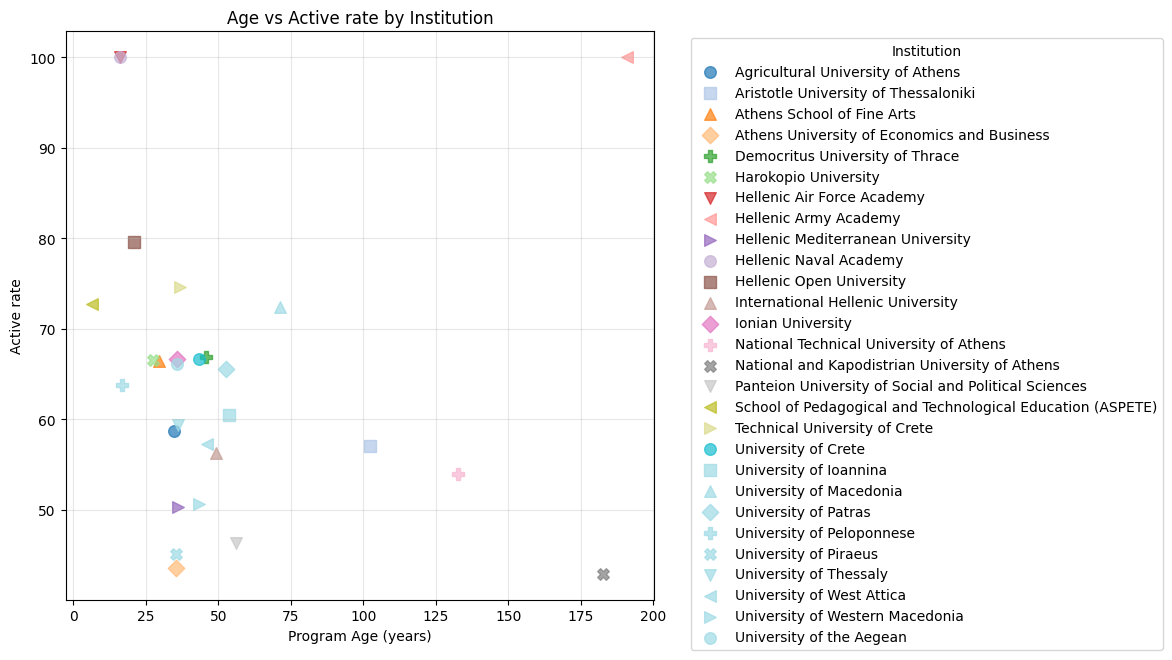

In [71]:
def plot_scatter_plot(df, metric):
    df['age'] = (
        pd.to_datetime(df['academic_year'].str.split('-').str[0], format="%Y")
        - pd.to_datetime(df['established'], format="%d/%m/%Y")
    ) / pd.Timedelta(days=365.25)

    performance_metric = metric
    
    plt.figure(figsize=(12, 7))

    markers = ['o', 's', '^', 'D', 'P', 'X', 'v', '<', '>']  # cycle through shapes
    colors = plt.colormaps.get_cmap("tab20")

    for i, (inst, group) in enumerate(df.groupby('institution')):
        plt.scatter(
            group['age'],
            group[performance_metric],
            alpha=0.7,
            label=inst,
            color=colors(i),
            marker=markers[i % len(markers)],
            s=70
        )
        
    plt.title(f"Age vs {performance_metric.replace('_', ' ').capitalize()} by Institution")
    plt.xlabel("Program Age (years)")
    plt.ylabel(performance_metric.replace('_', ' ').capitalize())
    
    plt.legend(title="Institution", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_scatter_plot(df_20_21, "graduate_rate")
plot_scatter_plot(df_20_21, "active_rate")

In [33]:
df_overall = df.groupby("academic_year", as_index=False)[["graduate", "registered", "enrolled", "active"]].sum()
df_overall["gradaute_rate"] = (df_overall["graduate"] / df_overall["active"]) * 100
df_overall["active_rate"] = (df_overall["active"] / df_overall["registered"]) * 100
df_overall

academic_year  graduate  registered  enrolled  active  gradaute_rate  \
0     2020-2021     56728      707197     91541  400242      14.173425   
1     2021-2022     57377      705318     81012  380830      15.066303   
2     2022-2023     54289      696779     69877  363209      14.947042   
3     2023-2024     55095      703857     68759  352099      15.647588   

   active_rate  
0    56.595546  
1    53.994085  
2    52.126858  
3    50.024224

In [63]:
def plot_sorted_bar_chart(df_grouped, metric_column):
    for year in YEARS:
        df_plot = df_grouped[df_grouped['academic_year'] == year].copy()
    
        df_plot = df_plot.sort_values(by=metric_column, ascending=True)
    
        y_values = df_plot[metric_column]
        x_positions = np.arange(len(df_plot))
        institution_labels = df_plot['institution']
    
        plt.figure(figsize=(10, 10))
    
        bar_container = plt.bar(
            x_positions,
            y_values,
            color='skyblue',
            label=metric_column.replace('_', ' ').title()
        )
    
        plt.xticks(
            x_positions,
            institution_labels,
            rotation=45,
            ha='right'
        )
    
        for bar in bar_container:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.,
                height + 0.5,
                f'{int(height)}',
                ha='center',
                va='bottom',
                rotation=45,
                fontsize=8
            )

        plt.title(f'{metric_column.replace("_", " ").title()} per Institution in {year}', fontsize=16)
        plt.xlabel('Institution', fontsize=12)
        plt.ylabel(metric_column.replace('_', ' ').title(), fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
        plt.tight_layout()
        plt.show()

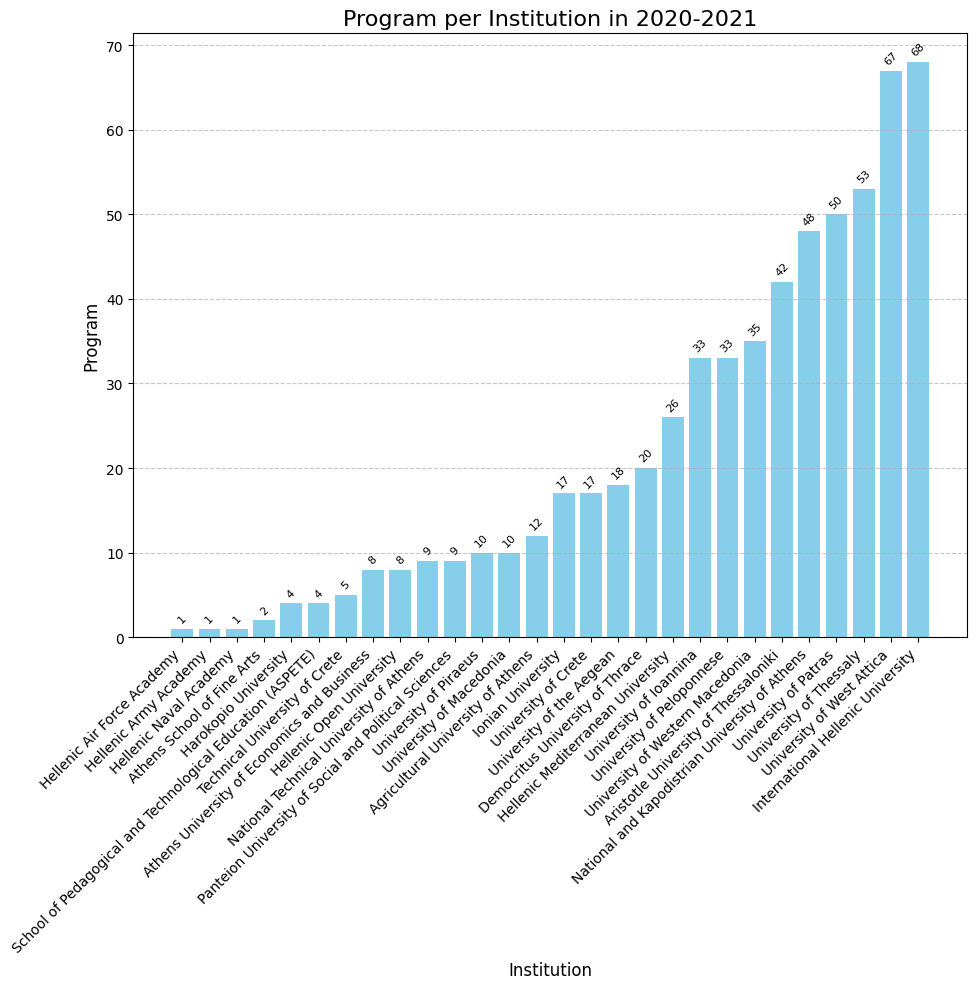

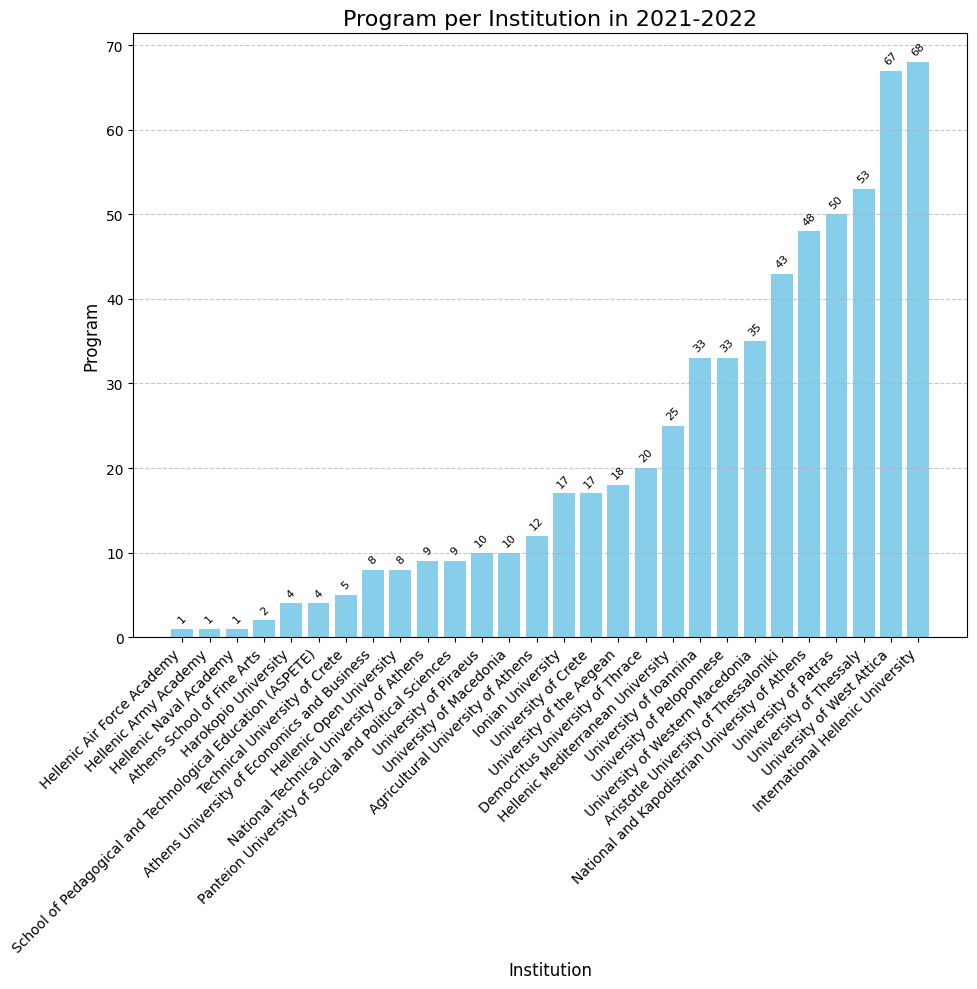

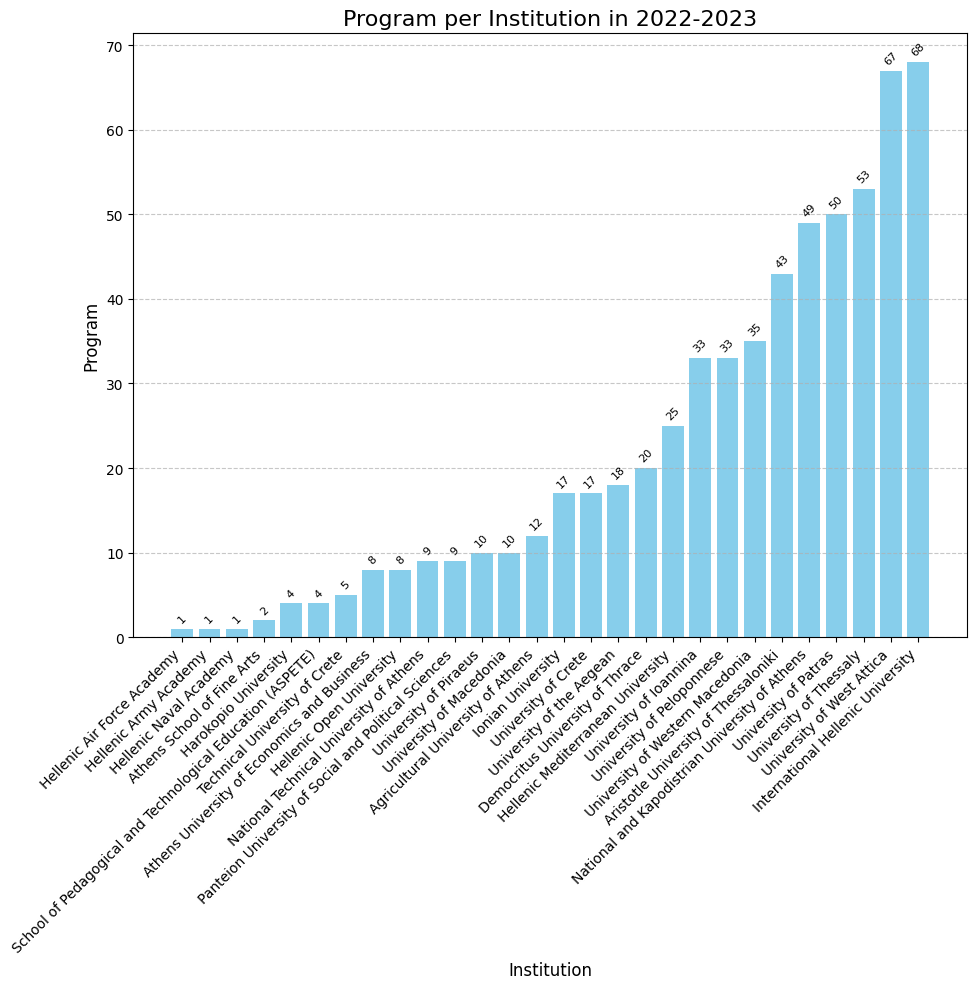

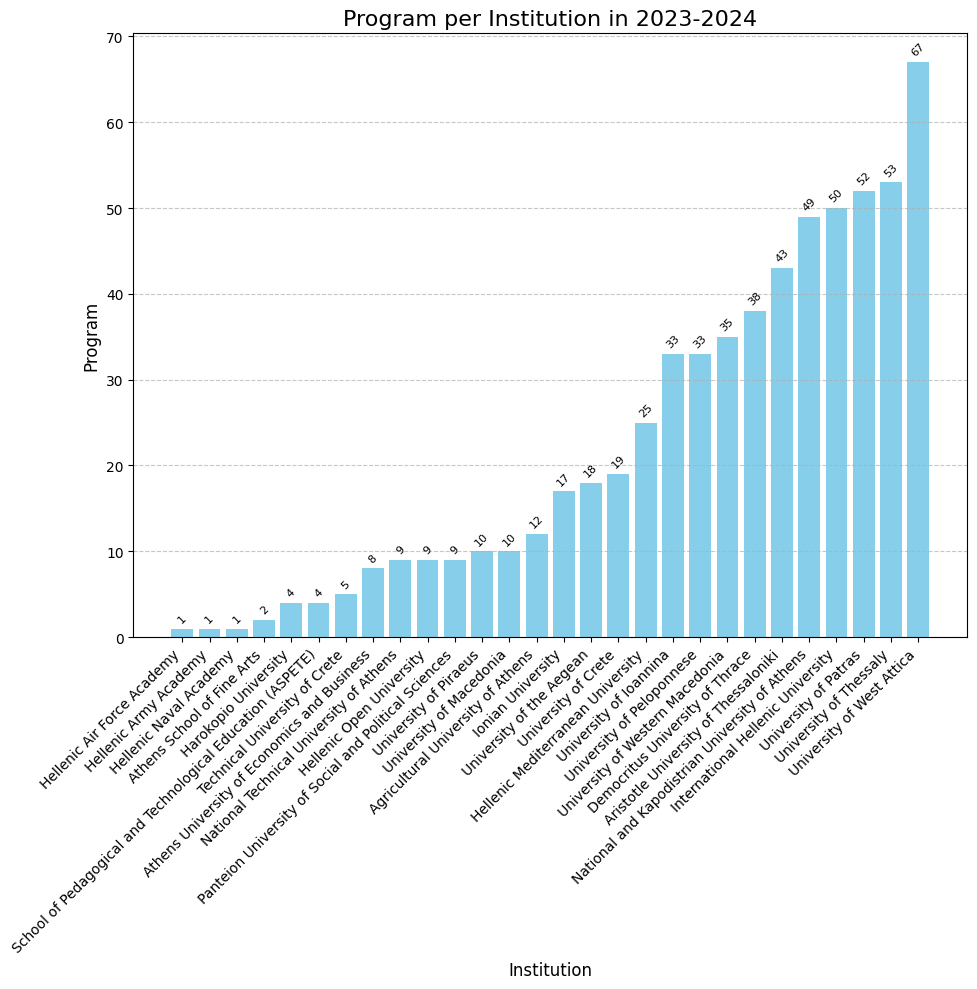

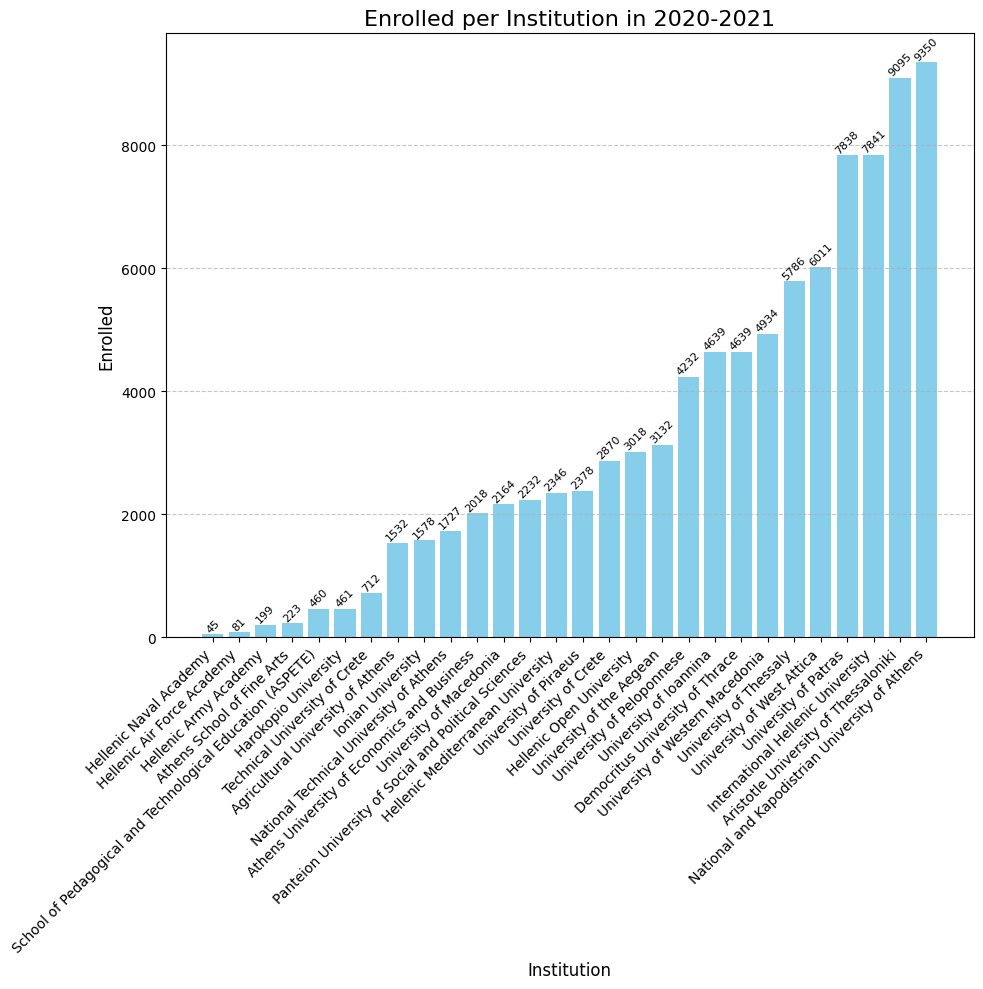

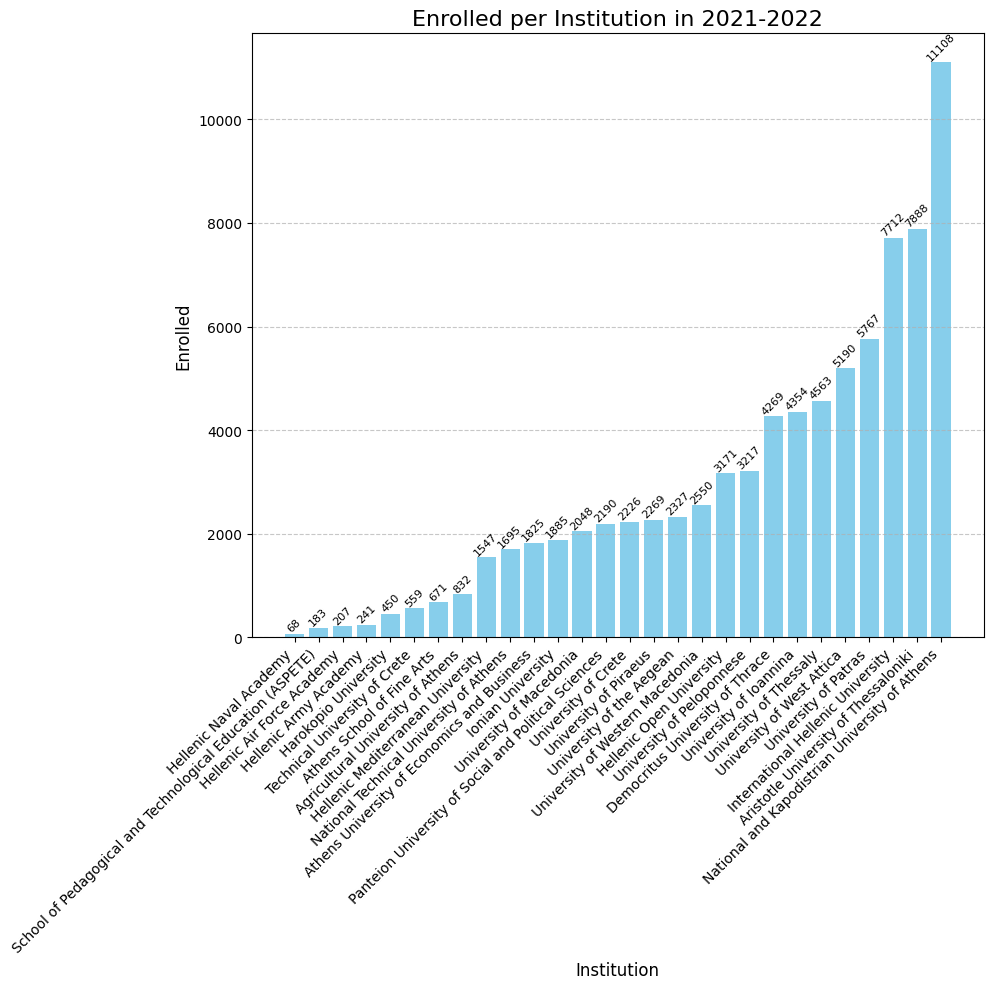

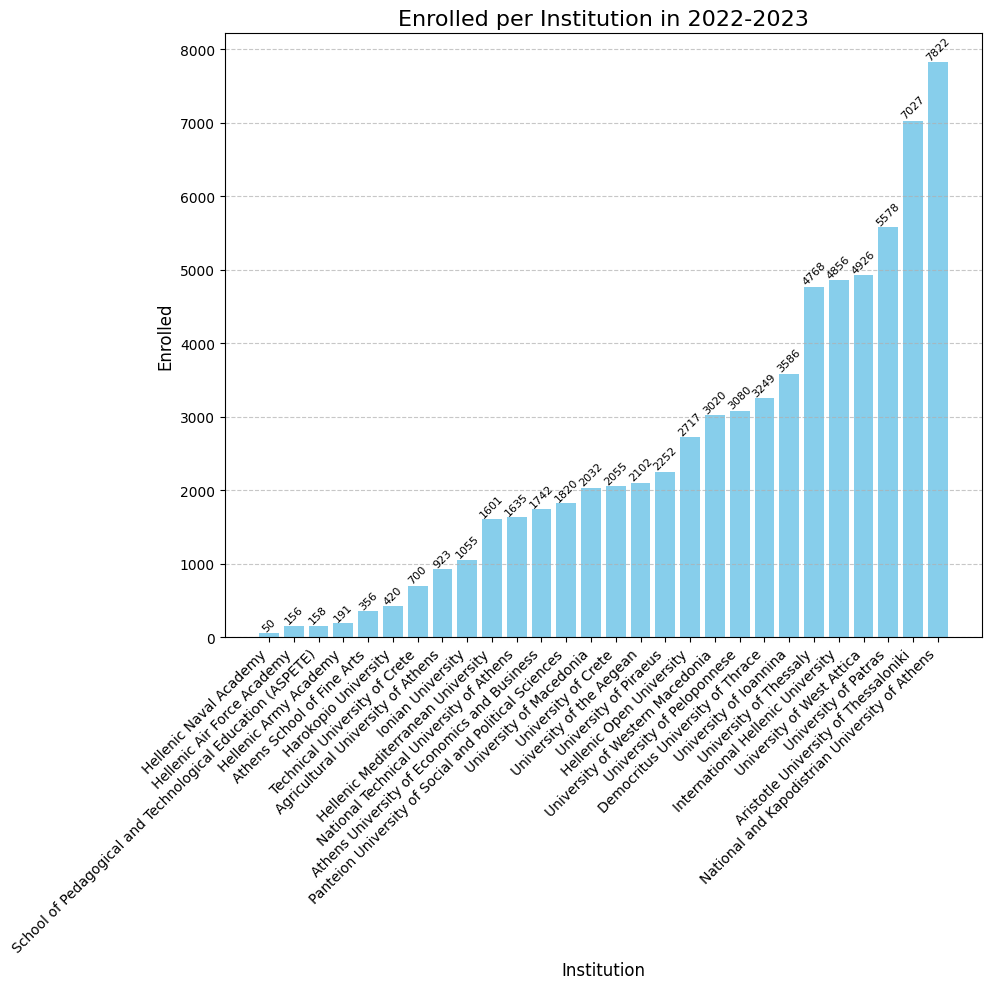

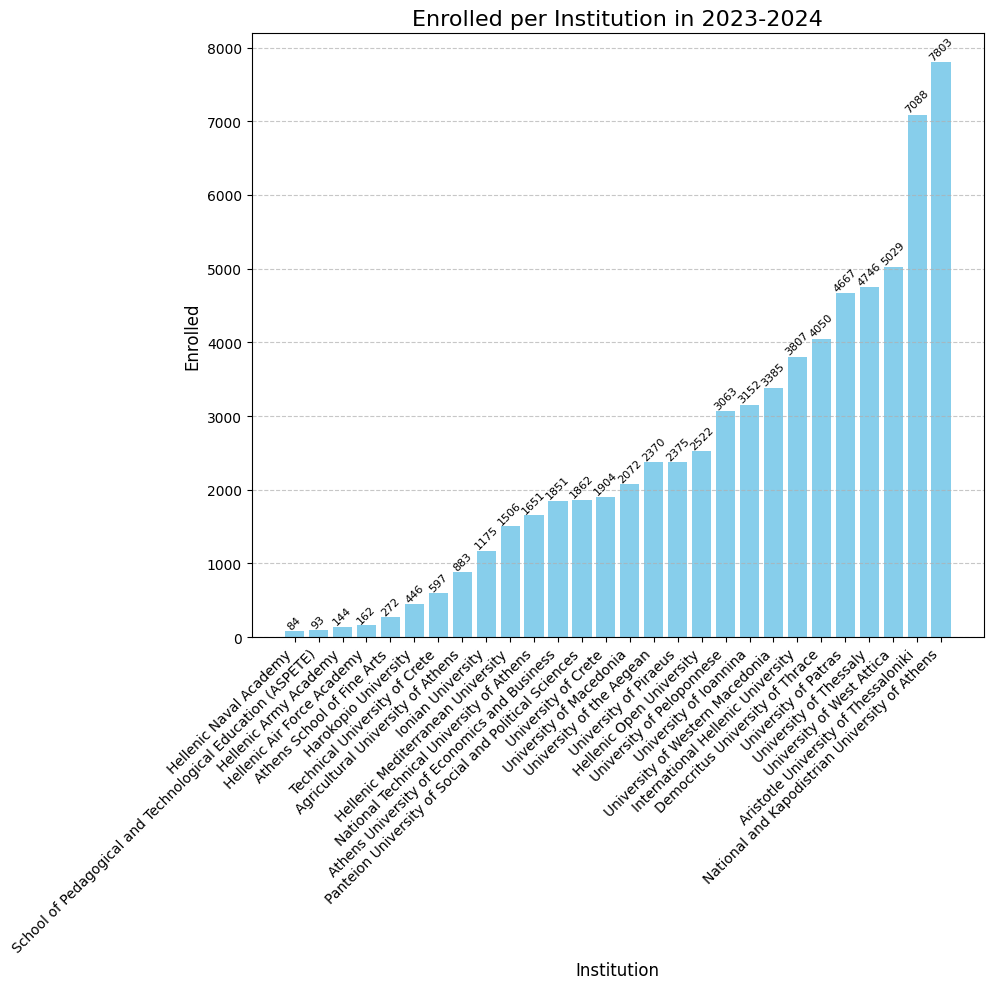

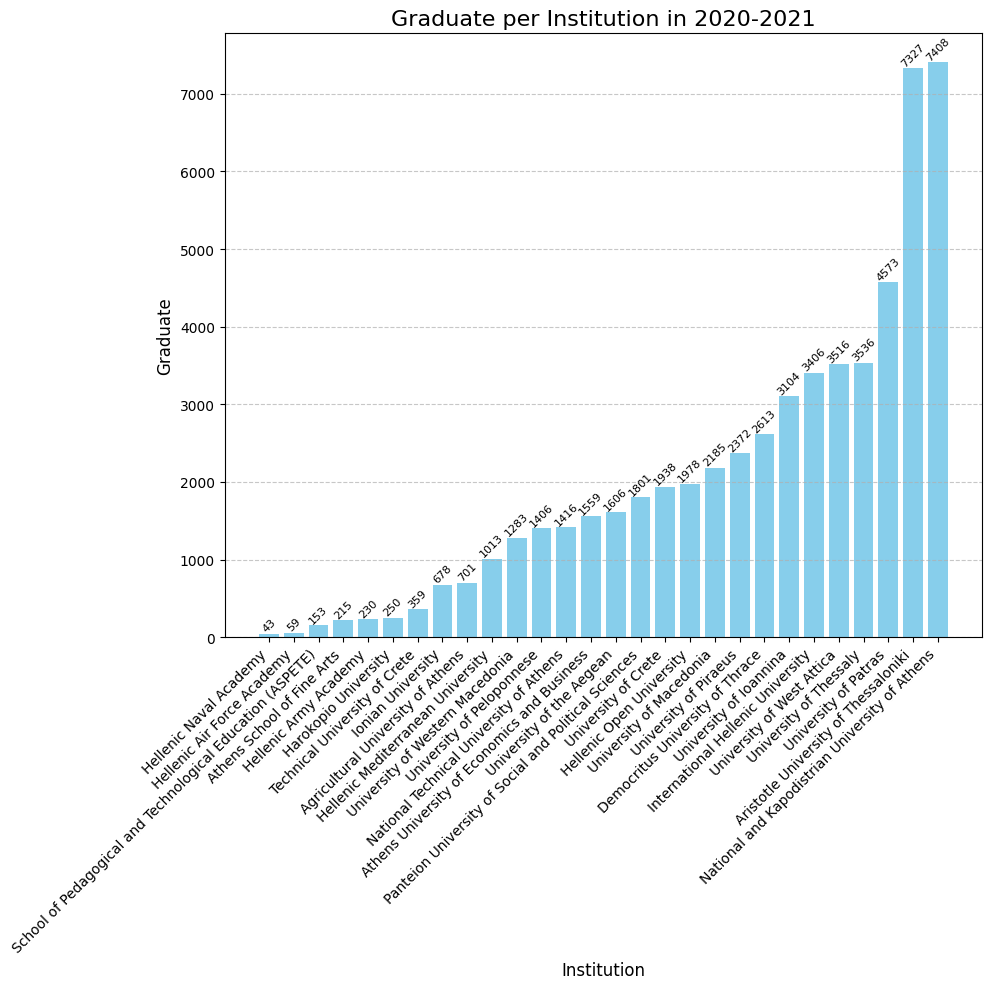

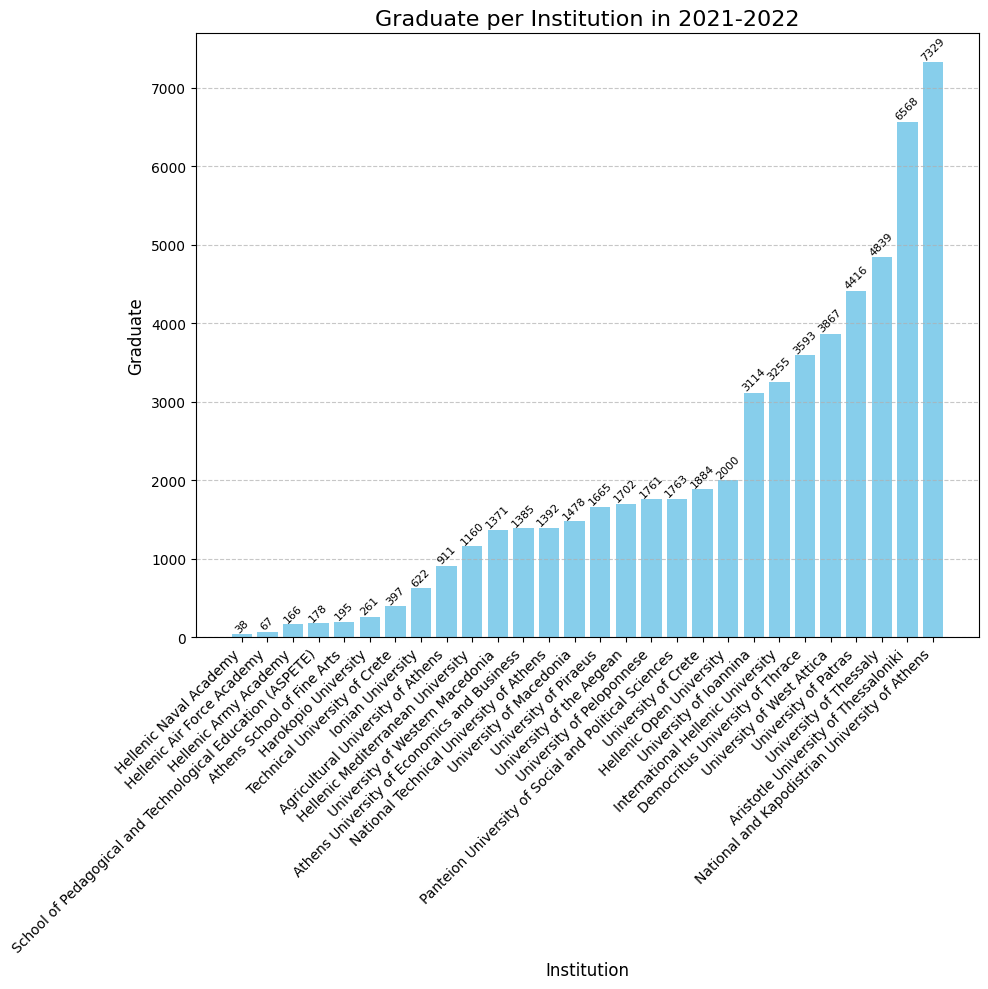

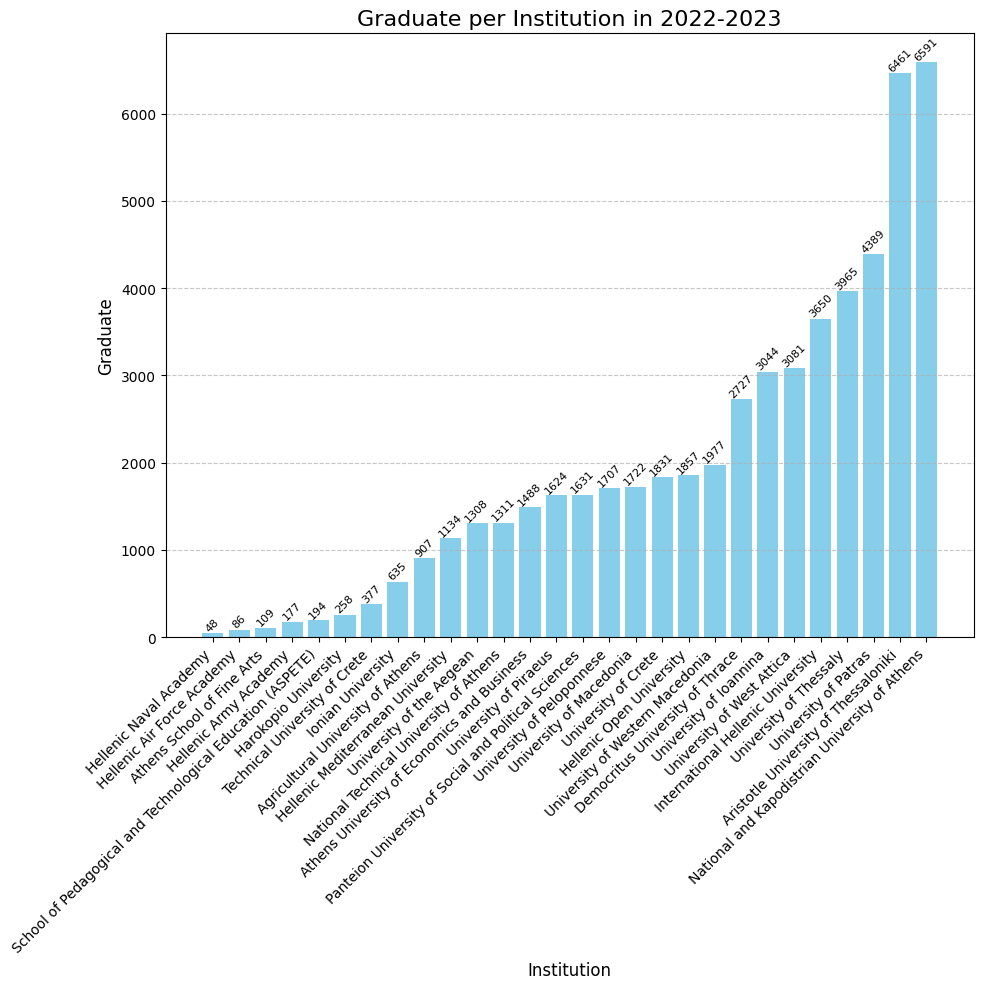

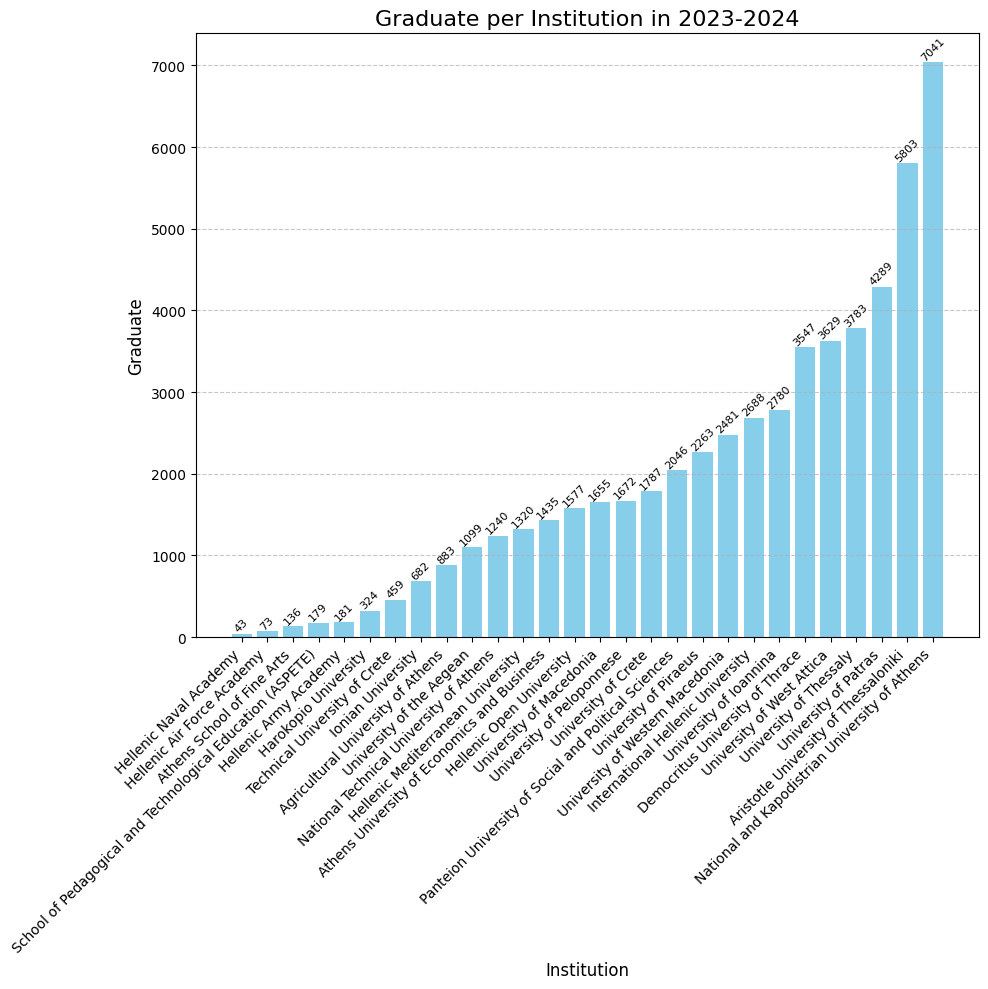

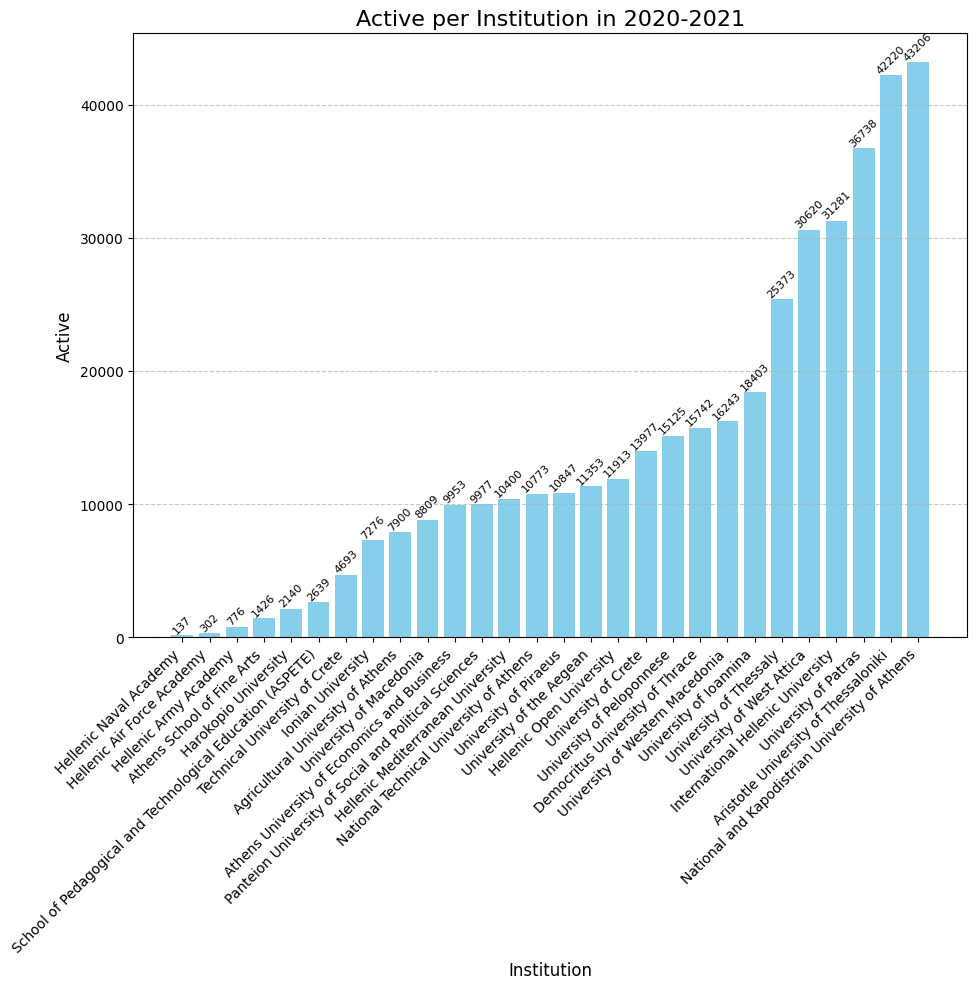

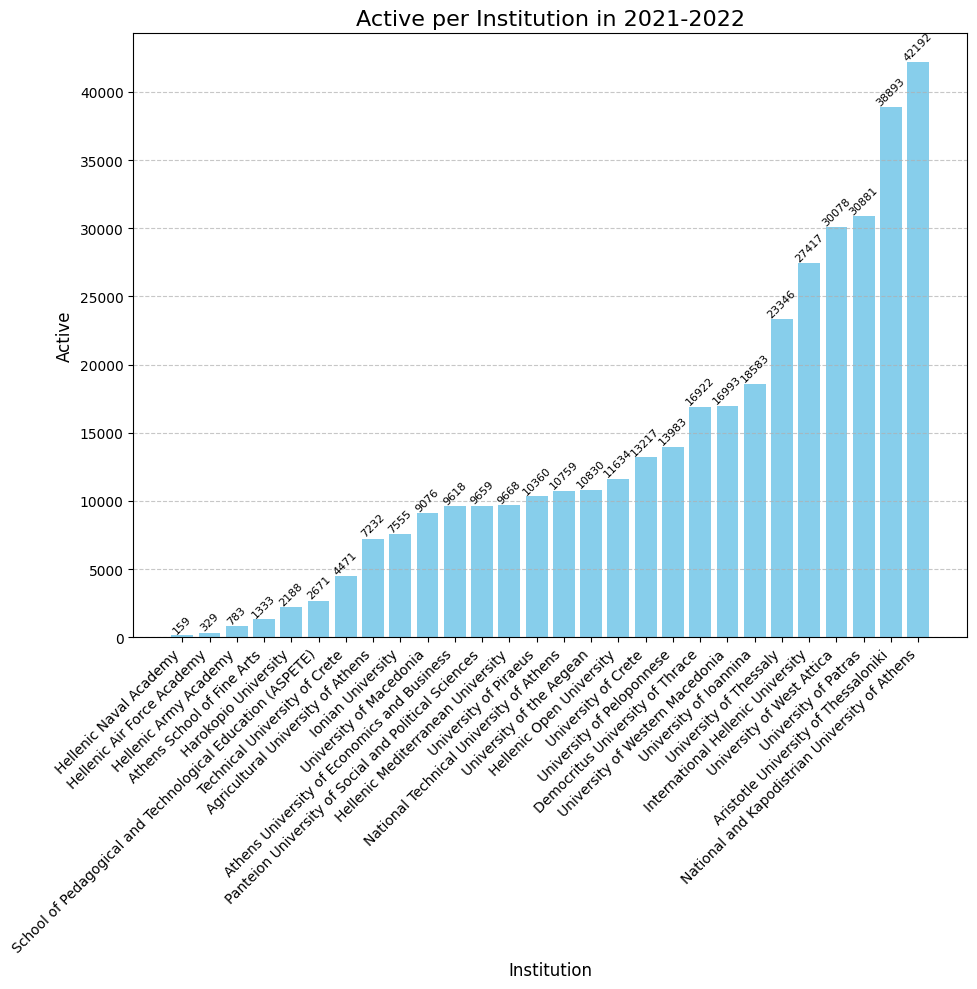

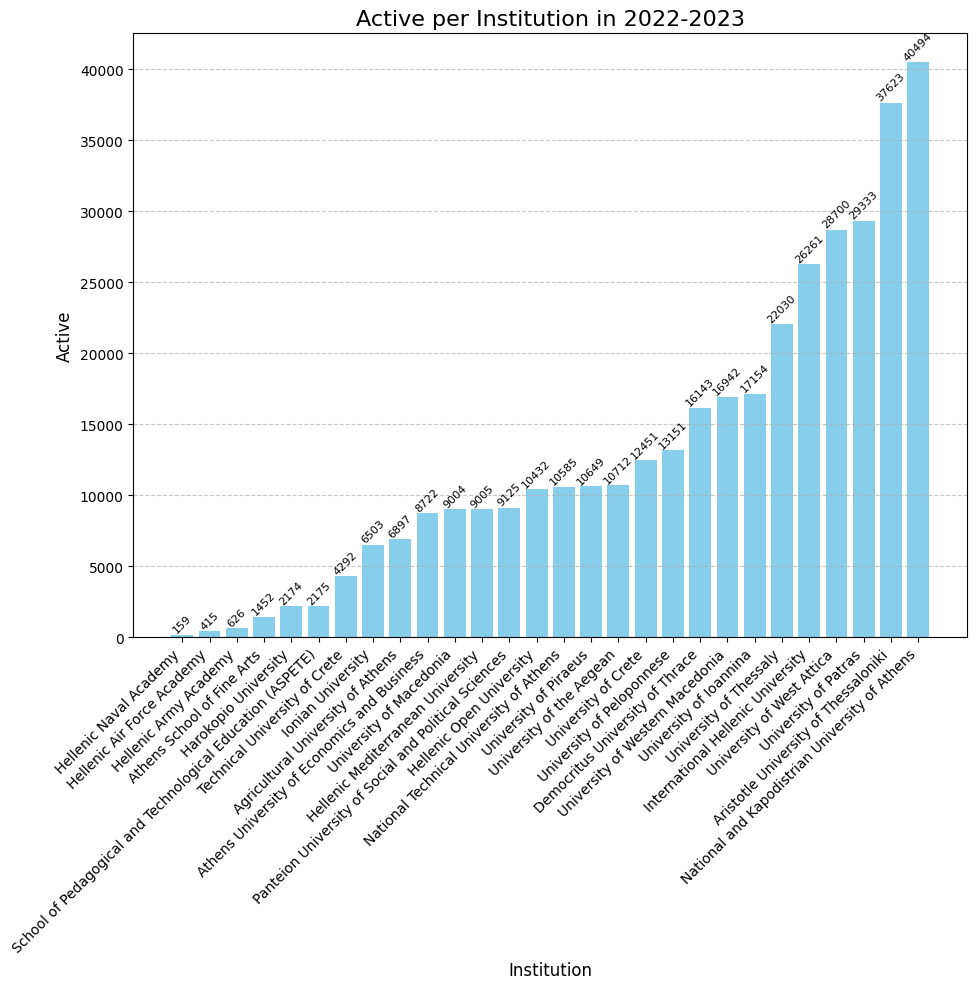

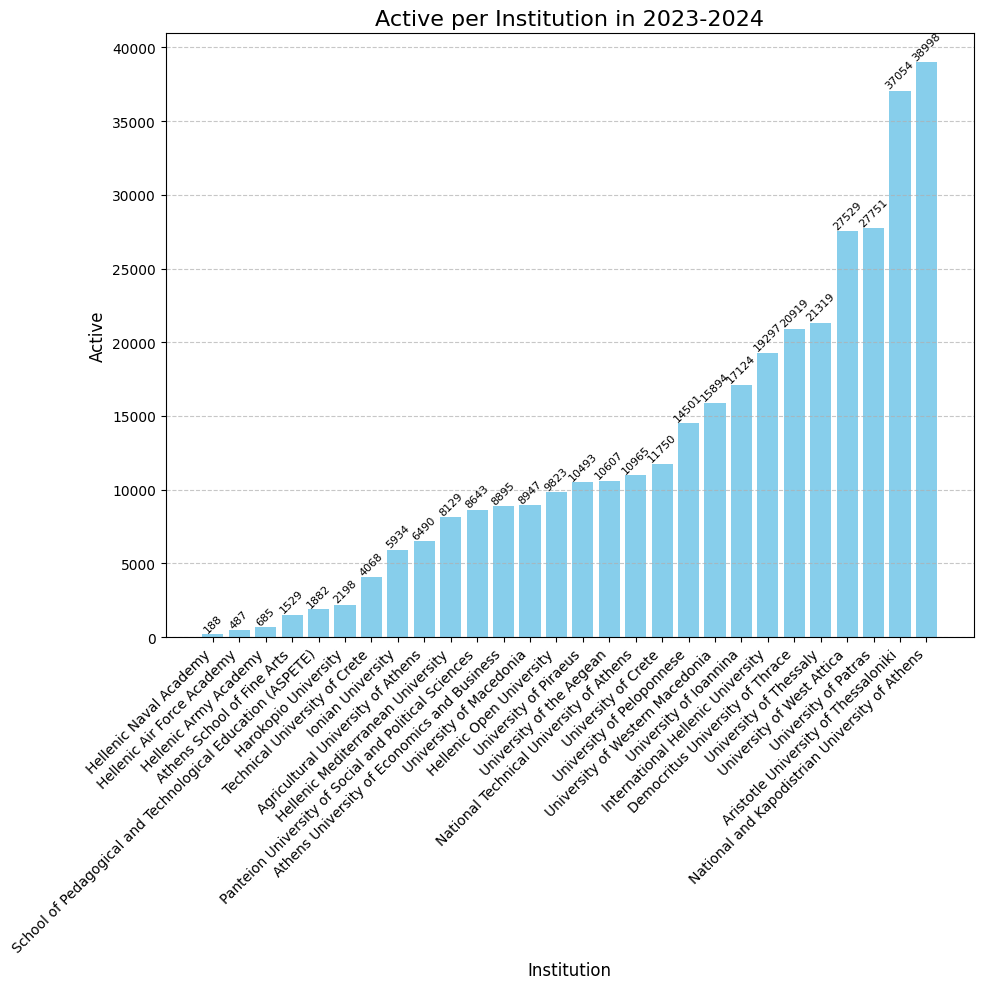

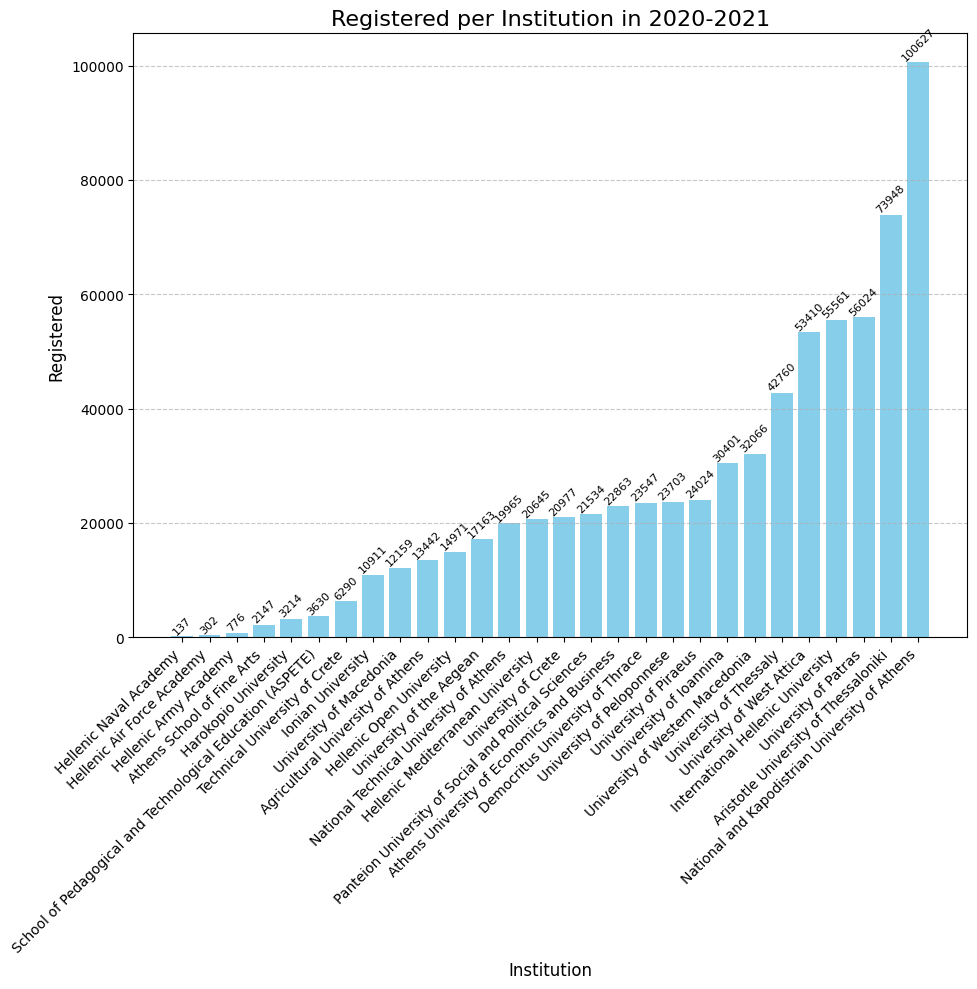

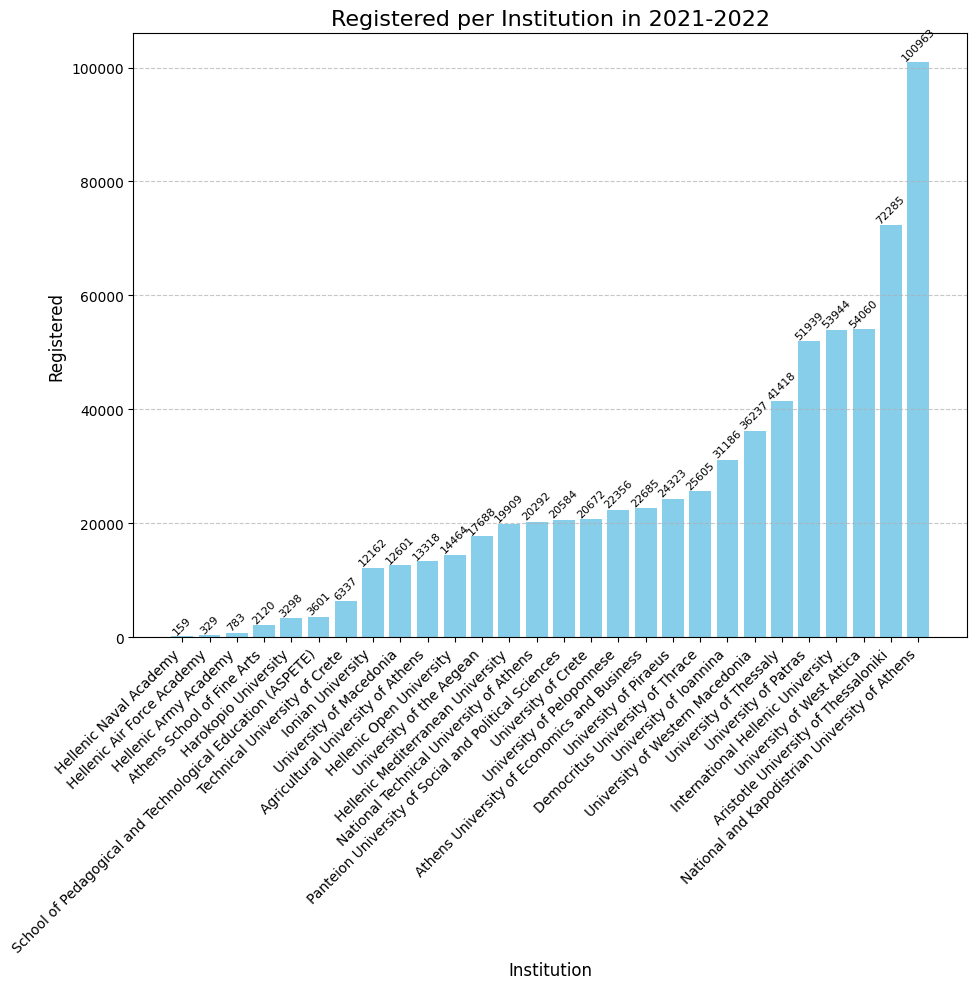

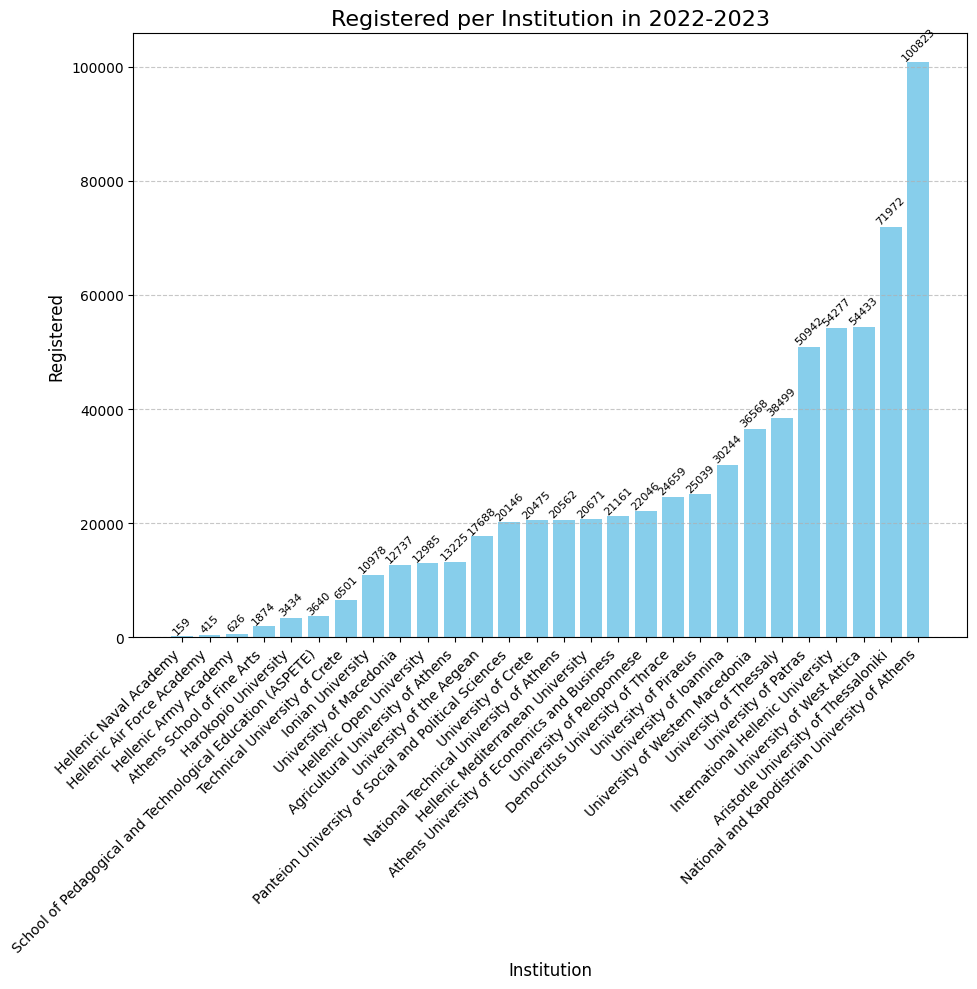

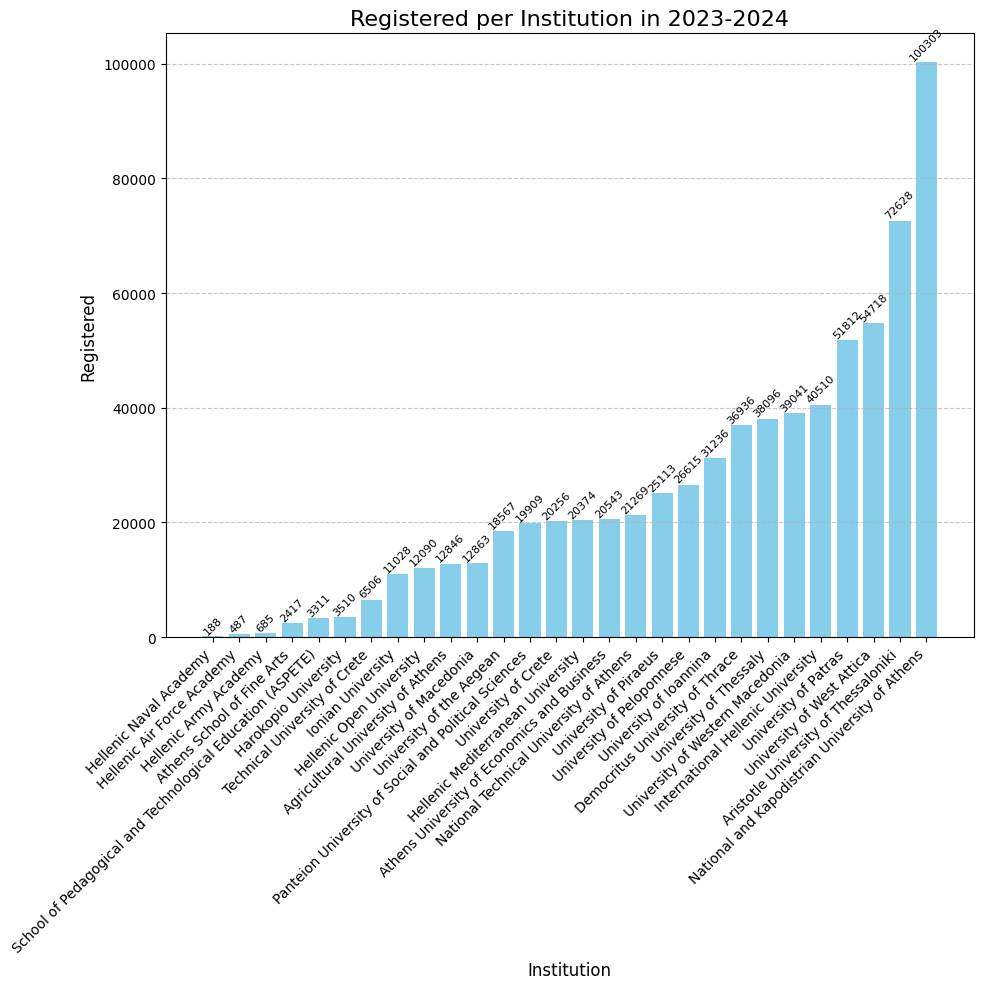

In [65]:
plot_sorted_bar_chart(df_grouped, 'program')
plot_sorted_bar_chart(df_grouped, 'enrolled')
plot_sorted_bar_chart(df_grouped, 'graduate')
plot_sorted_bar_chart(df_grouped, 'active')
plot_sorted_bar_chart(df_grouped, 'registered')


In [73]:
df["graduation_rate"] = (df["graduate"] / df["active"]) * 100

df["graduation_rate"] = df.apply(
    lambda row: (row["graduate"] / row["active"] if row["active"] != 0 and row["graduate"] <= row["active"] else np.nan) * 100,
    axis=1
)
df["graduation_rate"] = np.where(df["graduation_rate"] > 100, 100, df["graduation_rate"])
df

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


institution academic_year  \
0               Athens School of Fine Arts     2020-2021   
1               Athens School of Fine Arts     2020-2021   
2     Aristotle University of Thessaloniki     2020-2021   
3     Aristotle University of Thessaloniki     2020-2021   
4     Aristotle University of Thessaloniki     2020-2021   
...                                    ...           ...   
2446                Hellenic Naval Academy     2023-2024   
2447                  Harokopio University     2023-2024   
2448                  Harokopio University     2023-2024   
2449                  Harokopio University     2023-2024   
2450                  Harokopio University     2023-2024   

                                                program established  graduate  \
0                                             Fine Arts  1990-07-03        99   
1                                Art Theory and History  2009-09-07       116   
2                       English Language and Literature  1983-05-03       223   
3                Agricultural and Surveying Engineering  1962-10-24        75   
4                             Architectural Engineering  1983-05-03       142   
...                                                 ...         ...       ...   
2446                                     Naval Sciences  2003-10-07        43   
2447                                          Geography  1999-09-06        79   
2448                      Dietology - Nutrition Science  1992-06-12        89   
2449  Economy and Sustainable Development (formerly ...  1992-06-12        75   
2450                         Informatics and Telematics  2006-07-07        81   

      registered  enrolled  active  graduation_rate  
0           1570       140     983        10.071211  
1            577        83     443        26.185102  
2           1557       227     806        27.667494  
3            937       125     593        12.647555  
4           1297       161     973        14.594039  
...          ...       ...     ...              ...  
2446         188        84     188        22.872340  
2447        1012       108     511        15.459883  
2448         713        89     467        19.057816  
2449         716       104     466        16.094421  
2450        1069       145     754        10.742706  

[2451 rows x 9 columns]

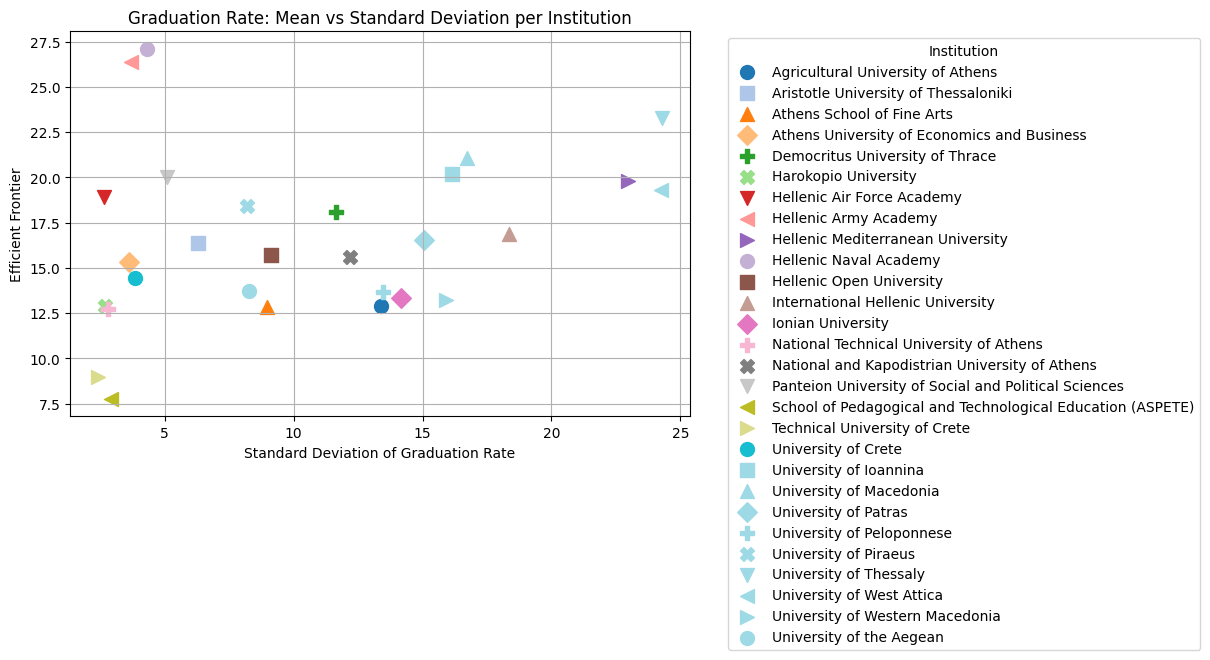

In [72]:
summary = df.groupby("institution")["graduation_rate"].agg(
    mean="mean",
    std=lambda x: np.std(x, ddof=1)
)

plt.figure(figsize=(8,5))

colors = plt.colormaps.get_cmap("tab20")
markers = ['o', 's', '^', 'D', 'P', 'X', 'v', '<', '>']

for i, institution in enumerate(summary.index):
    plt.scatter(
        summary["std"].iloc[i],
        summary["mean"].iloc[i],
        color=colors(i),
        label=institution,
        marker=markers[i % len(markers)],
        s=100
    )

plt.ylabel("Efficient Frontier")
plt.xlabel("Standard Deviation of Graduation Rate")
plt.title("Graduation Rate: Mean vs Standard Deviation per Institution")
plt.grid(True)
plt.legend(title="Institution", bbox_to_anchor=(1.05, 1), loc='upper left')   
plt.show()